# Project Structure and Overview
* The project aims to predict employee performance using the [INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 dataset](http://data.iabac.org/exam/p2/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls). The key steps in the project are as follows:

1. Data Loading and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Selection and Engineering
4. Model Training and Evaluation
5. Results and Insights

* The Summarized Project Structure
``` bash

├── Project_Analysis.ipynb
├── app.py
├── requirements.txt
├── Analysis.md
├── Project Summary.md
├── Requirement.md
├── references.md
├── data
│   ├── processed
│   └── raw
├── Visualization


```



# 1. Project Ideation

**Problem Statement**:

_To develop a model to predict future employee performance at INX Future Inc (INX) based on various factors such as demographic details, job role, satisfaction levels, and work-life balance._


* Specific Objectives:
    * Identify key factors that influence employee performance ratings.
    * Predict employee performance ratings based on features of importance.
    * Recommend strategies for performance improvement.

**Aim** 

_This model will help identify key attributes influencing employee performance and aid hiring, performance rating and inform retention strategies._


### Specific Objectives

1.  **Identify Key Factors Influencing Employee Performance**:

    -   Analyze historical data to determine the most significant variables affecting employee performance ratings at INX. These could include demographic details (e.g., age, gender, education), job-related factors (e.g., role, tenure, department), and workplace satisfaction metrics (e.g., work-life balance, job satisfaction).
2.  **Predict Employee Performance Ratings**:

    -   Develop and train a machine learning model to predict employee performance ratings using the identified key factors. The model will be tested and validated to ensure accuracy and reliability.
3.  **Recommend Strategies for Performance Improvement**:

    -   Based on the model's findings, propose actionable strategies for INX to improve employee performance. These recommendations could focus on targeted interventions, employee engagement programs, or adjustments to work policies.

### Rationale

Employee performance is a critical factor in the success of any organization. For INX, being able to predict performance ratings will not only streamline the evaluation process but also allow the company to proactively address potential issues before they affect overall productivity. By understanding the attributes that most strongly correlate with high or low performance, INX can tailor its HR strategies to optimize employee satisfaction, retention, and overall organizational success.

This model will serve as a valuable tool in INX's efforts to build a more efficient, motivated, and productive workforce. It will enable data-driven decisions in hiring, employee development, and retention, ultimately leading to better alignment between employee capabilities and organizational goals.

# 2. Data Collection and Preparation
* File: `data_processing.ipynb`
* **Purpose**: To load, clean, and preprocess the dataset to ensure quality data for analysis and model building.

* Steps:
    * _Load the datasets_: Import the datasets into the notebook.
    * _Handle Missing Values_: Impute or remove missing values.
    * _Remove Duplicates_: Check and remove any duplicate rows.
    * _Data Type Conversion_: Convert data types where necessary.
    * _Generate Data Summaries_: Frequencies, measures of central tendency, spread, and shape.
    * _Outlier Detection_: Identify and handle outliers if necessary.
    * _Save cleaned data to a csv file_

## 2.1 Data Loading and Initial Exploration

In [1]:
# Import libraries
import pandas as pd # A library used for data manipulation and analysis. It provides data structures like DataFrame for handling data efficiently.
import numpy as np # A library used for numerical operations on large, multi-dimensional arrays and matrices.
import matplotlib.pyplot as plt # A library used for creating static, interactive, and animated visualizations in Python. 
import seaborn as sns # A data visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
import os # A library that provides a way to interact with the operating system e.g. create/remove a directory, file, path handling etc.

In [2]:
# Load the dataset
df = pd.read_excel('./data/raw/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

-   **`pd.read_excel`**: This is a function from the `pandas` library that reads data from an Excel file and loads it into a DataFrame. 

    -   **`'data/raw/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'`**: This is a string representing the file path to the Excel file. It indicates that the file is located in the `data/raw` directory and is named `INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls`.

    -   **`df`**: This is a variable that will store the DataFrame created by reading the Excel file.
    -   A DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns).

In [3]:
# Inspect the top 5 rows in the DataFrame
df.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

**`df.head()`**: This method from the `pandas` library returns the first 5 rows of the DataFrame `df`. 
- It is commonly used to quickly view a sample of the data to understand its structure, columns, and initial content.

In [4]:
# Inspect and obtain an overview of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

**`df.info()`**: This method provides a concise summary of the DataFrame `df`. 
- It includes information about the DataFrame's structure and data, such as the number of non-null entries, data types of each column, and memory usage.
-   **`<class 'pandas.core.frame.DataFrame'>`**: Indicates that `df` is a DataFrame, a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure provided by the `pandas` library.
    -   **`RangeIndex: 1200 entries, 0 to 1199`**: Shows that the DataFrame contains 1200 rows, indexed from 0 to 1199.
    -   **`Data columns (total 28 columns):`**: Lists the total number of columns in the DataFrame, which is 28.
    -   **Column Information**:
        -   **`#`**: Index of the column.
        -   **`Column`**: Name of the column.
        -   **`Non-Null Count`**: Number of non-null entries in the column (all columns have 1200 non-null values, indicating no missing data).
        -   **`Dtype`**: Data type of the column.
            -   **`int64`**: Integer type (19 columns).
            -   **`object`**: Object type, typically used for text or categorical data (9 columns).
            -   **`memory usage: 262.6+ KB`**: Indicates the amount of memory used by the DataFrame.

In [5]:
# Statistical summary of numerical variables
df.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

* The `df.describe()` function provides a statistical summary of the numerical variables in the DataFrame. 
count: The number of non-null entries for each column, which is 1200 for all numerical columns, indicating that there are no missing values in these columns.
1. _mean_: The average value of each numerical column. For example, the average age of employees is approximately 36.92 years.
2. _std_: The standard deviation, which measures the dispersion of the values from the mean. For example, the standard deviation of the age is 9.08, indicating variability around the average age.
3. _min_: The minimum value in each column. For example, the minimum age is 18 years.
4. _25%_: This is the 25th percentile value, which means 25% of the data falls below this value. For example, 25% of the employees are 30 or younger.
5. _50%_: The 50th percentile value, also known as the median. For example, the median age is 36 years.
6. _75%_: The 75th percentile value, meaning 75% of the data falls below this value. For example, 75% of the employees are 43 or younger.
7. _max_: The maximum value in each column. For example, the maximum age is 60 years.
* This statistical summary helps in understanding the distribution and spread of numerical variables within the DataFrame, which is useful for further analysis and data cleaning.

In [6]:
# Statistical summary of categorical variables
df.describe(include=['object'])

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

* The `df.describe(include=['object'])` function provides a statistical summary of the categorical (non-numeric) variables in the DataFrame. 
    -   **`count`**: The number of non-null entries for each categorical column, which is 1200 for all columns, indicating that there are no missing values in these columns.
    -   **`unique`**: The number of unique categories in each column. For example, there are 2 unique values for the `Gender` column.
    -   **`top`**: The most frequent category in each column. For example, the most common `Gender` is "Male".
    -   **`freq`**: The frequency of the most common category. For example, "Male" appears 725 times in the `Gender` column.
* This statistical summary helps in understanding the distribution and frequency of categorical variables

## 2.2 Data Cleaning

In [7]:
# Check for missing values if any
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

* The `df.isnull().sum()` function checks for any missing values in the DataFrame and provides the count of missing values for each column. 
    - There were no missing values in the DataFrame

* There are no missing values in the DataFrame hence no need of handling missing values with the following method:

* Handle missing values


df.fillna(df.median(), inplace=True)  # Or use other imputation methods

In [8]:
# Remove any duplicate records in the DataFrame
df.drop_duplicates(inplace=True)

* The `df.drop_duplicates(inplace=True)` function is used to remove duplicate rows from the DataFrame. Here's an explanation of what this command does:
- **`df.drop_duplicates()`**: This method identifies and removes duplicate rows in the DataFrame based on all columns. 
    - It returns a new DataFrame with duplicate rows removed.
- **`inplace=True`**: This parameter modifies the DataFrame in place without returning a new DataFrame. 
    - If `inplace=False` (the default), a new DataFrame with duplicates removed would be returned, and the original DataFrame would remain unchanged.
##### Purpose
* The purpose of this command is to ensure that each row in the DataFrame is unique, which is important for accurate analysis and results. Removing duplicates helps in maintaining the integrity of the data.


In [9]:
# Convert categorical columns to appropriate types
categorical_cols = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 
                     'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']
df[categorical_cols] = df[categorical_cols].astype('category')

-  **`categorical_cols`**: This is a list of column names that are considered categorical variables. 
    - These columns contain values that represent categories or labels, not numerical quantities.
-  **`df[categorical_cols]`**: This selects the columns listed in `categorical_cols` from the DataFrame `df`.
-  **`.astype('category')`**: This method converts the selected columns to the `category` data type. 
    - This is more efficient for categorical data and can improve performance in certain operations, such as grouping or filtering.

##### Purpose
Converting columns to the `category` type helps in:
-  **Memory Efficiency**: Categorical types are more memory-efficient compared to object types because they use integer codes internally.
-  **Performance**: Operations on categorical data can be faster, especially when dealing with large datasets.
-  **Data Analysis**: Ensures that the data is treated appropriately during analysis, such as aggregations or plotting.

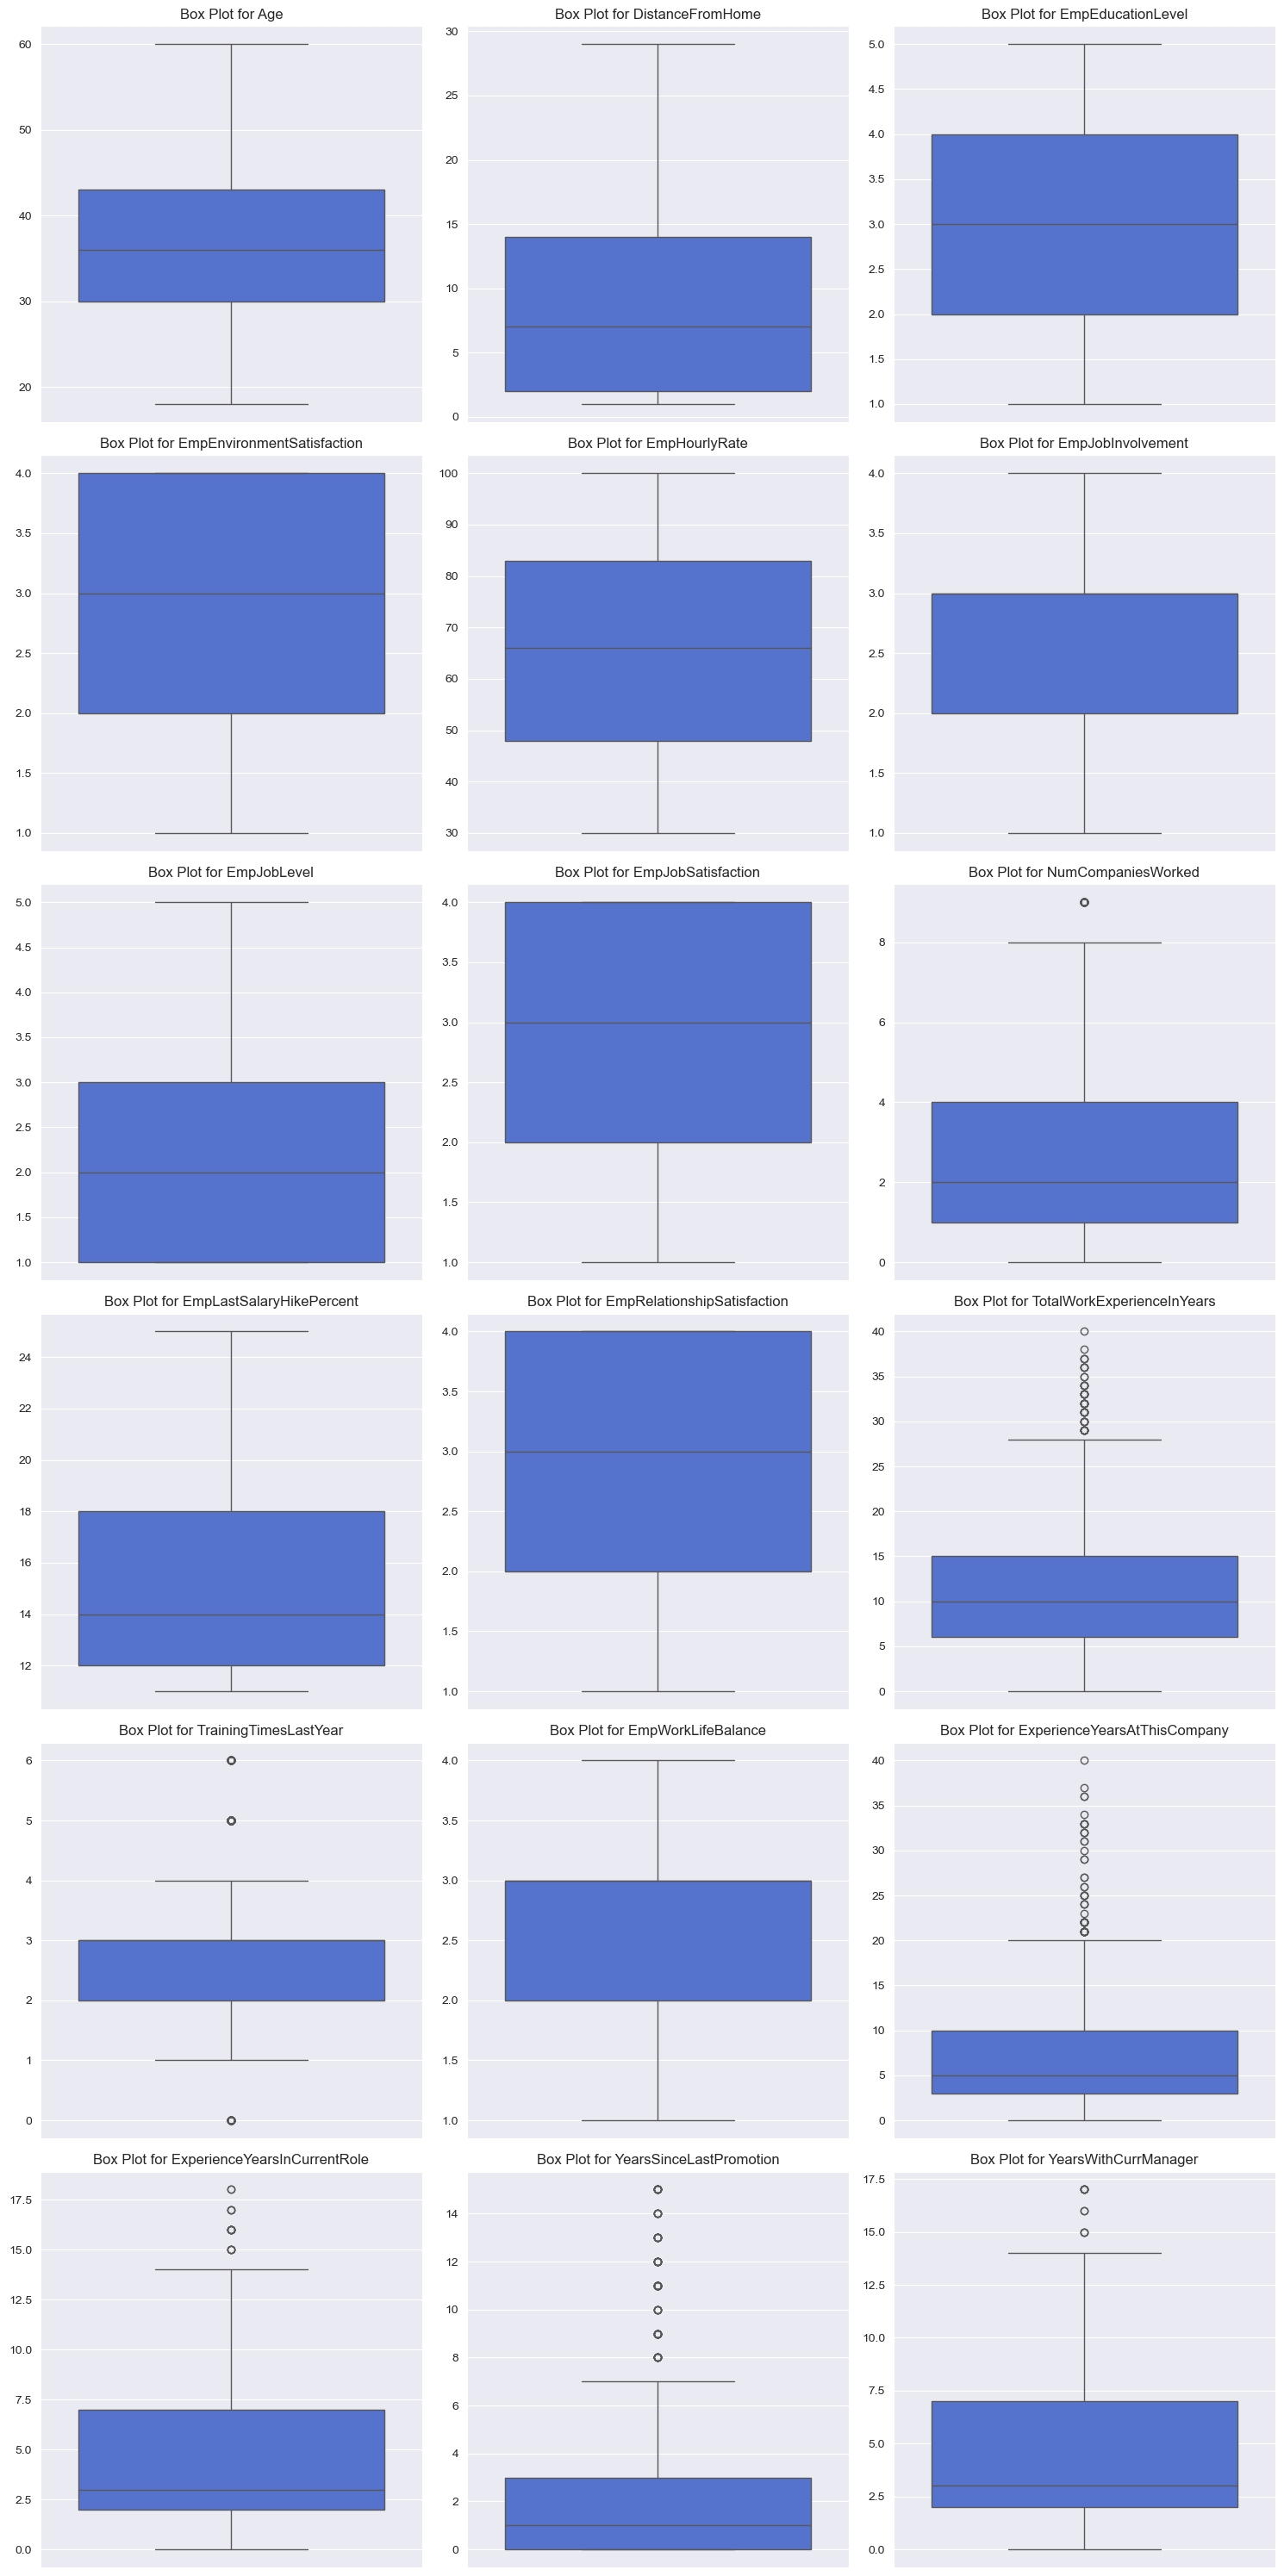

Plots saved to ./src/visualization\box_plots_matrix.png


In [10]:
# Outlier detection and handling

# 1. Outlier Analysis

# Ensure the directory exists
save_dir = './src/visualization'
os.makedirs(save_dir, exist_ok=True)

# Apply dark/darkgrid/white/whitegrid style
sns.set_style('darkgrid')

# Define numerical cols

# Get all numerical columns
all_numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Exclude the specific column 'PerformanceRating'
excluded_column = 'PerformanceRating'
numerical_cols = [col for col in all_numerical_cols if col != excluded_column]

# Number of columns to display per row
ncols = 3
nrows = (len(numerical_cols) + ncols - 1) // ncols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each box plot
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df[col], ax=axes[i], color='royalblue')
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Save the figure
output_file = os.path.join(save_dir, 'box_plots_matrix.png')
plt.savefig(output_file)

# Show the plot
plt.show()

print(f"Plots saved to {output_file}")


- **Ensure Directory Exists**: Creates the directory `visualization` if it doesn't already exist using `os.makedirs`.
    - **Apply Style**: Sets the style of the plots to `'darkgrid'` using `sns.set_style`, which improves the aesthetics of the plots.
    - **Define Numerical Columns**:
    - **`all_numerical_cols`**: Retrieves all columns of numerical data from the DataFrame.
    - **`excluded_column`**: Specifies a column to exclude (`'PerformanceRating'` in this case).
    - **`numerical_cols`**: Filters out the excluded column and creates a list of numerical columns to include in the plots.
- **Subplot Configuration**:
    - **`ncols` and `nrows`**: Determines the layout of the subplots. Sets the number of columns per row and calculates the number of rows needed.
    - **`fig, axes`**: Creates a grid of subplots with the specified number of rows and columns.
- **Plot Each Box Plot**:
    - **`sns.boxplot`**: Generates a box plot for each numerical column, showing the distribution and potential outliers.
    - **`axes[i].set_title`**: Sets the title for each subplot.
    - **`axes[i].set_xlabel('')` and `axes[i].set_ylabel('')`**: Removes axis labels for a cleaner look.
    - **Hide Unused Subplots**: Removes any extra subplots that are not used.
    - **Adjust Layout**: Optimizes the layout of the plots using `plt.tight_layout`.
    - **Save and Show Plot**:
    - **`output_file`**: Defines the path where the plots will be saved.
    - **`plt.savefig`**: Saves the figure to the specified file.
    - **`plt.show`**: Displays the plots on the screen.

In [11]:
# 2. This is how you would address the outliers
# for col in numerical_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     df = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]
# However, the numerical columns exhibit real-life value ranges and hence no outliers will be removed


-   **Interquartile Range (IQR)**:

    -   **Q1**: The 25th percentile of the data.
    -   **Q3**: The 75th percentile of the data.
    -   **IQR**: The difference between Q3 and Q1, representing the middle 50% of the data.
-   **Outlier Filtering**:

    -   Outliers are typically defined as values that lie below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.
    -   The code filters the DataFrame `df` to exclude any rows where the value in a numerical column falls outside of these bounds.

#### Decision on Outliers
In this dataset, the numerical columns are determined to reflect accurate and realistic data ranges,

In [12]:
# Drop irrelevant columns
df = df.drop(columns=['EmpNumber'])

# In data preprocessing, it is common to drop columns that do not contribute to the analysis or model development. 
# Here, the `EmpNumber` column is removed from the DataFrame.


In [13]:
# Save processed data
df.to_csv('./data/processed/cleaned_data.csv', index=False)

- After completing the data preprocessing steps, it is essential to save the cleaned and processed data for future use or analysis. 
- The data is saved in CSV format to the specified directory.
- **`df.to_csv('data/processed/cleaned_data.csv', index=False)`**:
    - This command saves the DataFrame `df` to a CSV file named `cleaned_data.csv` in the `data/processed` directory.
      **`index=False`**: This argument ensures that the DataFrame index is not saved as a separate column in the CSV file, keeping the file clean and focused on the actual data.


# 3. Exploratory Data Analysis (EDA)

* File: `data_exploratory_analysis.ipynb`
* **Purpose**: To understand the distribution of data, identify patterns, and visualize key insights.

* Steps:

    * _Analyze Numerical variables_: Understand the distribution and relationships.
    * _Analyze Categorical variables_: Examine frequency and impact on the target variable.
    * _Correlation Analysis_: Check correlations between features.
    * _Visualizations_: Create visualizations using Matplotlib and other styling libraries like ggplot and viridis.

In [14]:
# Import libraries
import pandas as pd # A library used for data manipulation and analysis. It provides data structures like DataFrame for handling data efficiently.
import matplotlib.pyplot as plt # A library used for creating static, interactive, and animated visualizations in Python. 
import seaborn as sns # A data visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
import os # A library that provides a way to interact with the operating system e.g. create/remove a directory, file, path handling etc.
import warnings
warnings.filterwarnings("ignore") #Ignore all warnings


## 3.1 Numerical and Categorical Feature Analysis

In [15]:
# load data for EDA
df = pd.read_csv('./data/processed/cleaned_data.csv')

In [16]:
# Ensure the directory exists
save_dir = './src/visualization'
os.makedirs(save_dir, exist_ok=True)

-  **`save_dir = 'src/visualization'`**:
    -  This defines the path to the directory where the files will be saved.
-  **`os.makedirs(save_dir, exist_ok=True)`**:
    -  **`os.makedirs()`**: This function creates a directory recursively. If any of the intermediate-level directories do not exist, they will be created as well.
    -  **`exist_ok=True`**: This parameter prevents the function from raising an error if the directory already exists.

In [17]:
# Set styling
plt.style.use('ggplot')

**`plt.style.use('ggplot')`**:
-  **`plt.style.use()`**: This function allows you to apply a specific style to all the plots you generate.
-  **`'ggplot'`**: A predefined style inspired by the ggplot2 package in R, known for its simple and effective visuals.

<Figure size 2000x1500 with 0 Axes>

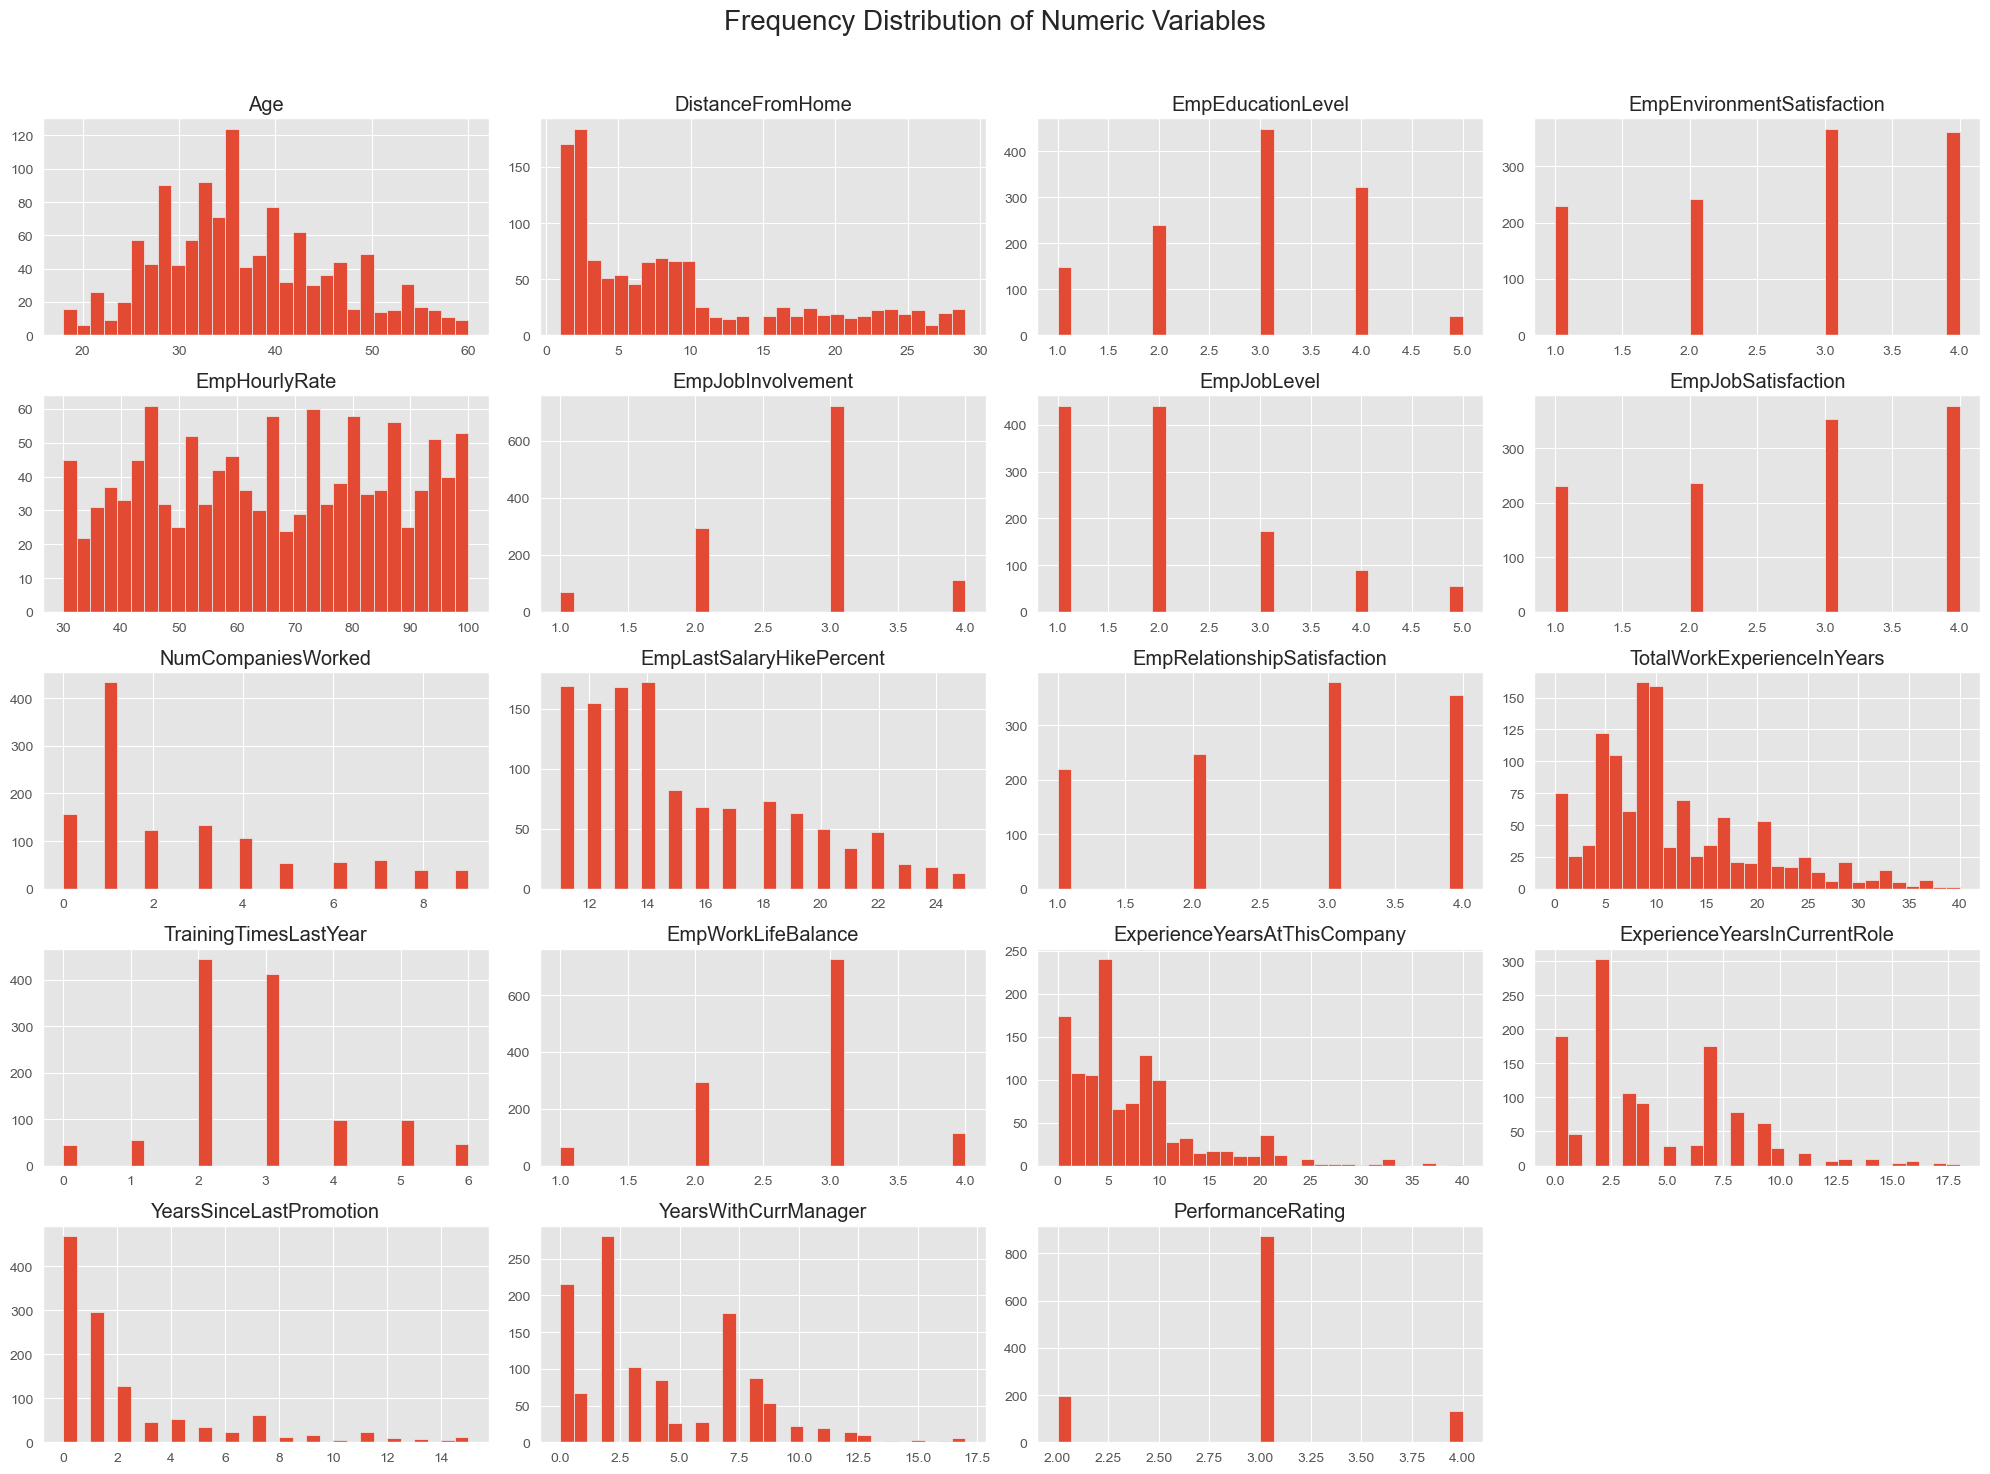

In [18]:
# Frequency distributions for numerical features

# Create a figure with a specified size
plt.figure(figsize=(20, 15))  # Sets the overall size of the figure to 20x15 inches

# Generate histograms for all numeric columns in the DataFrame
df.hist(bins=30, figsize=(20, 15))  # Each numeric column gets its own histogram with 30 bins, size of each subplot is also 20x15 inches

# Add a title to the entire figure
plt.suptitle('Frequency Distribution of Numeric Variables', fontsize=20)  # Adds a main title to the figure with a font size of 20

# Adjust the layout to make space for the main title
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjusts the padding between and around subplots to avoid overlap, reserving space at the top for the title

# Define the file path to save the histogram plot
hist_file = os.path.join(save_dir, 'numerical_features_histograms.png')  # Constructs the path for saving the plot image in the 'save_dir' directory

# Save the figure to the specified file path
plt.savefig(hist_file)  # Saves the figure as an image file at the specified location

# Display the figure
plt.show()  # Renders the figure in the output

# Close the figure to free up memory
plt.close()  # Closes the figure to prevent it from displaying again and to free up system resources


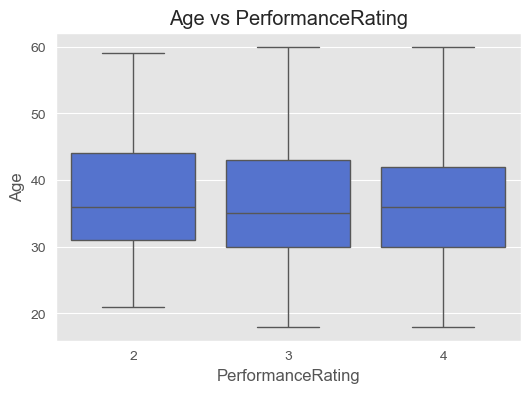

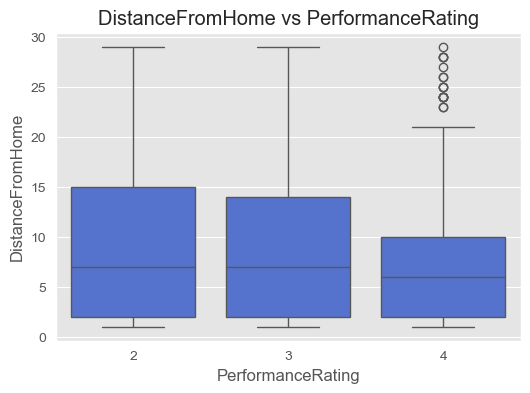

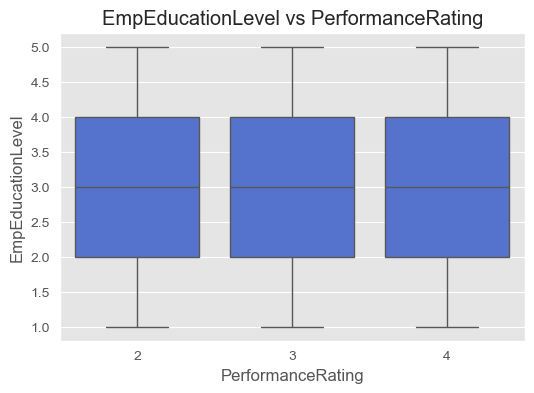

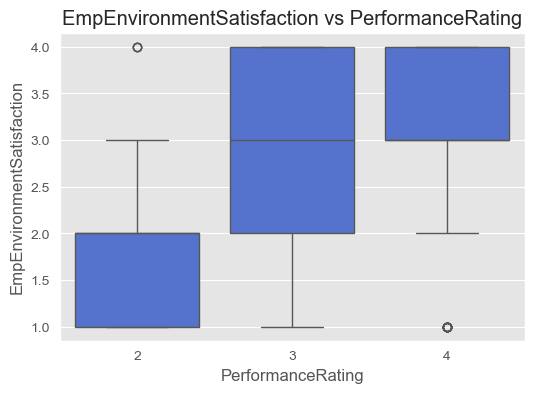

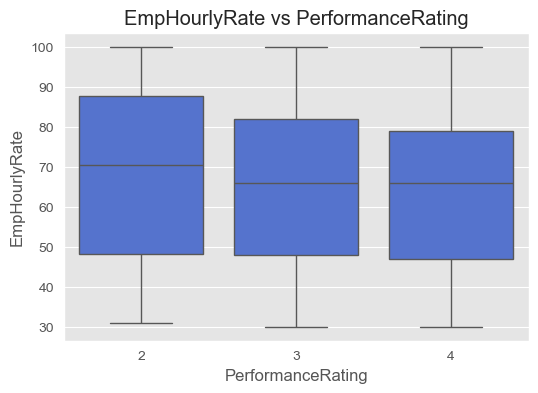

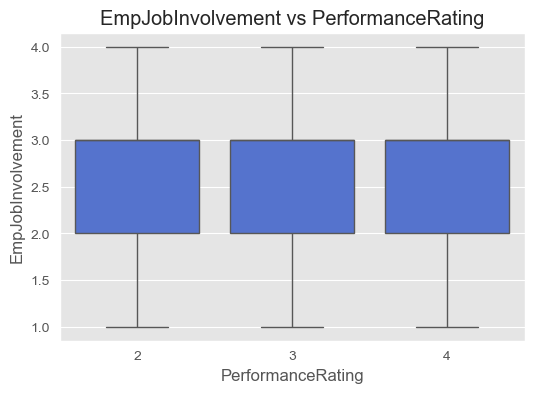

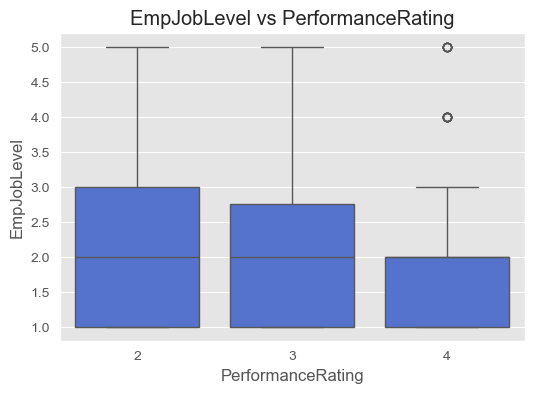

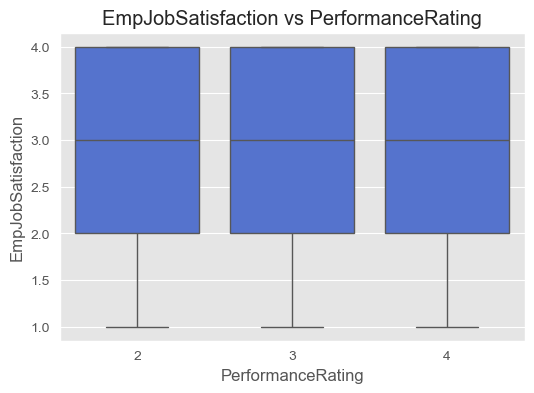

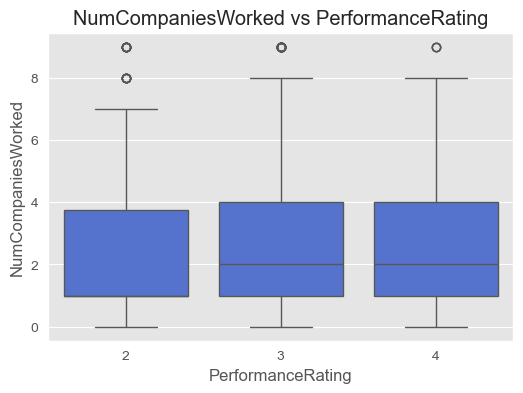

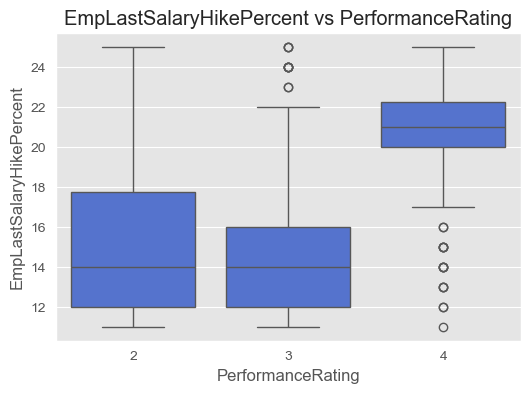

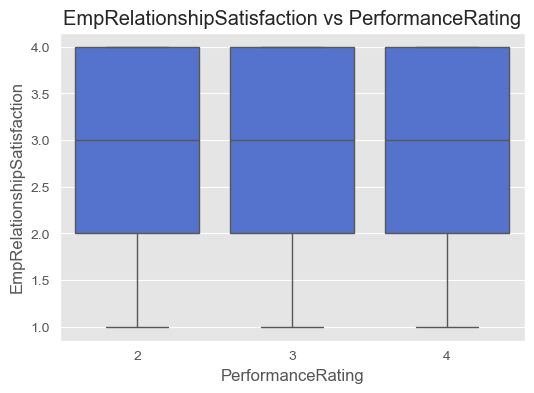

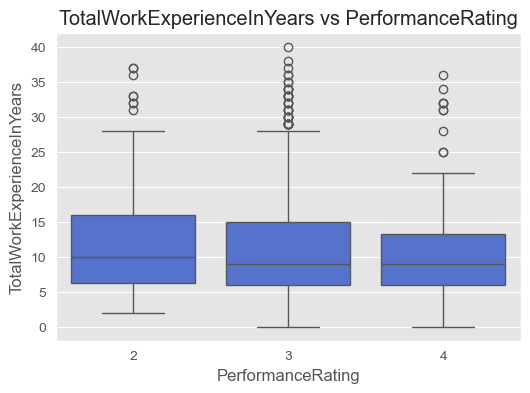

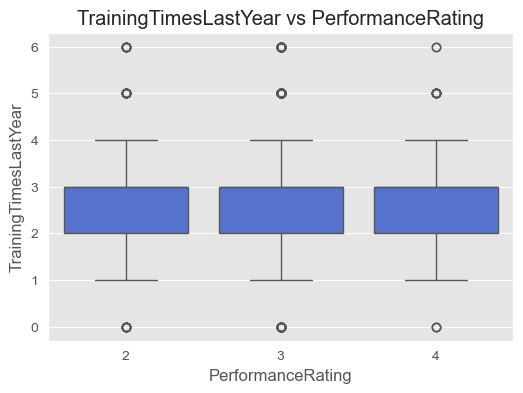

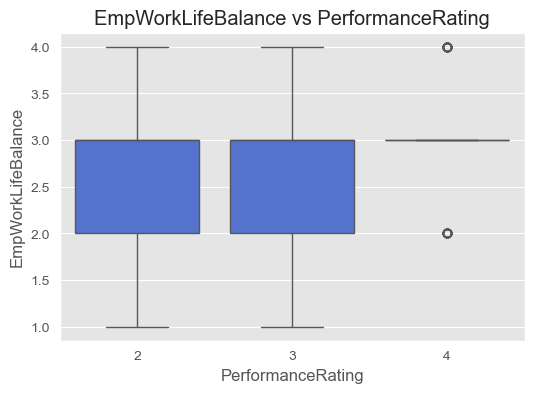

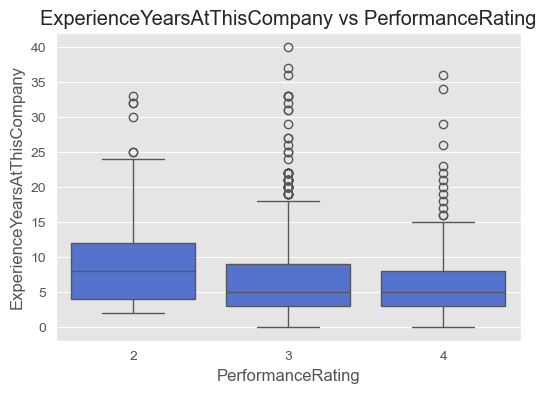

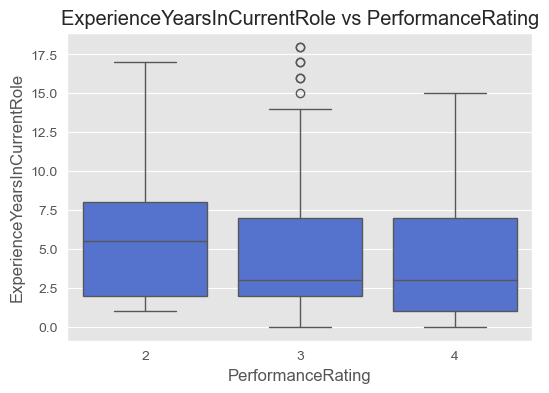

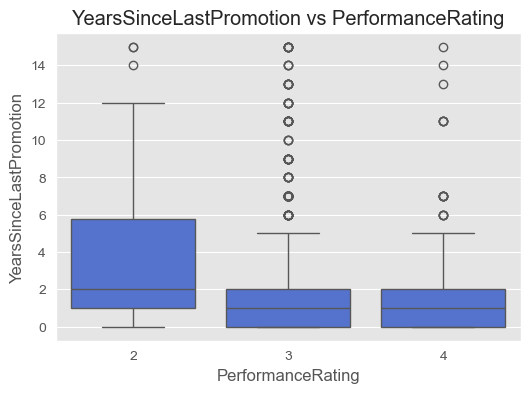

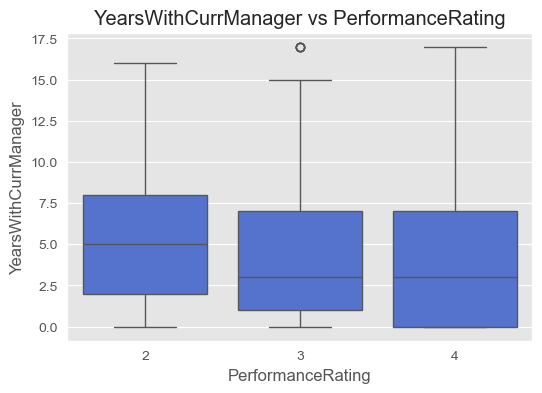

In [19]:
# Use a valid style
# File Name: visualize.ipynb
plt.style.use('ggplot')

# Get all numerical columns
all_numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Exclude the specific column 'PerformanceRating'
excluded_column = 'PerformanceRating'
numerical_features = [col for col in all_numerical_cols if col != excluded_column]

# Boxplots for numerical features vs. PerformanceRating

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='PerformanceRating', y=feature, data=df, color='royalblue')
    plt.title(f'{feature} vs PerformanceRating')
    plt.savefig(f'{save_dir}/{feature}_vs_PerformanceRating.png')
    plt.show()

#### Explanation of the Boxplots for Numerical Features vs. PerformanceRating
1. **Set the Plotting Style**:
    ```python
    plt.style.use('ggplot')
    ```
    - This line sets the style of the plots to 'ggplot', which is a popular plotting style that provides a clean and aesthetically pleasing look, similar to the ggplot2 package in R.
2. **Get All Numerical Columns**:
    ```python
    all_numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    ```
    - This command selects all columns in the DataFrame `df` that have numerical data types (e.g., integers, floats).
    - The `.select_dtypes(include=['number'])` method filters out non-numeric columns, and `.columns.tolist()` converts the column names to a list.
3. **Exclude 'PerformanceRating' Column**:
    ```python
    excluded_column = 'PerformanceRating'
    numerical_features = [col for col in all_numerical_cols if col != excluded_column]
    ```
    - The `excluded_column` variable is set to `'PerformanceRating'`, indicating that this column should not be included in the analysis.
    - The `numerical_features` list comprehension iterates over all numerical columns and includes only those columns that are not `'PerformanceRating'`.
4. **Create Boxplots for Each Numerical Feature**:
    ```python
    for feature in numerical_features:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='PerformanceRating', y=feature, data=df, color='royalblue')
        plt.title(f'{feature} vs PerformanceRating')
        plt.savefig(f'{save_dir}/{feature}_vs_PerformanceRating.png')
        plt.show()
    ```
    - **Loop Through Numerical Features**:
        - The `for` loop iterates over each numerical feature in the `numerical_features` list.
    - **Create a New Figure**:
        - `plt.figure(figsize=(6, 4))` initializes a new figure with dimensions of 6x4 inches for each plot.
    - **Generate the Boxplot**:
        - `sns.boxplot(x='PerformanceRating', y=feature, data=df, color='royalblue')` creates a boxplot comparing the numerical feature with `PerformanceRating`. The boxplot is colored in 'royalblue'.
    - **Set the Title**:
        - `plt.title(f'{feature} vs PerformanceRating')` sets the title of the plot, indicating which numerical feature is being compared to `PerformanceRating`.
    - **Save the Plot**:
        - `plt.savefig(f'{save_dir}/{feature}_vs_PerformanceRating.png')` saves the plot as a PNG file in the directory specified by `save_dir`, with the filename based on the feature name.
    - **Display the Plot**:
        - `plt.show()` displays the plot in the output. This is useful when running the code in an interactive environment like Jupyter Notebook or a script where you want to see the plots immediately.
#### Outcome:
- The code generates and saves individual boxplots for each numerical feature (except `PerformanceRating`) against `PerformanceRating`.
- These boxplots help visualize the distribution of numerical features across different levels of `PerformanceRating`, allowing for the detection of patterns between numerical variables and performance rating (Target) variable.

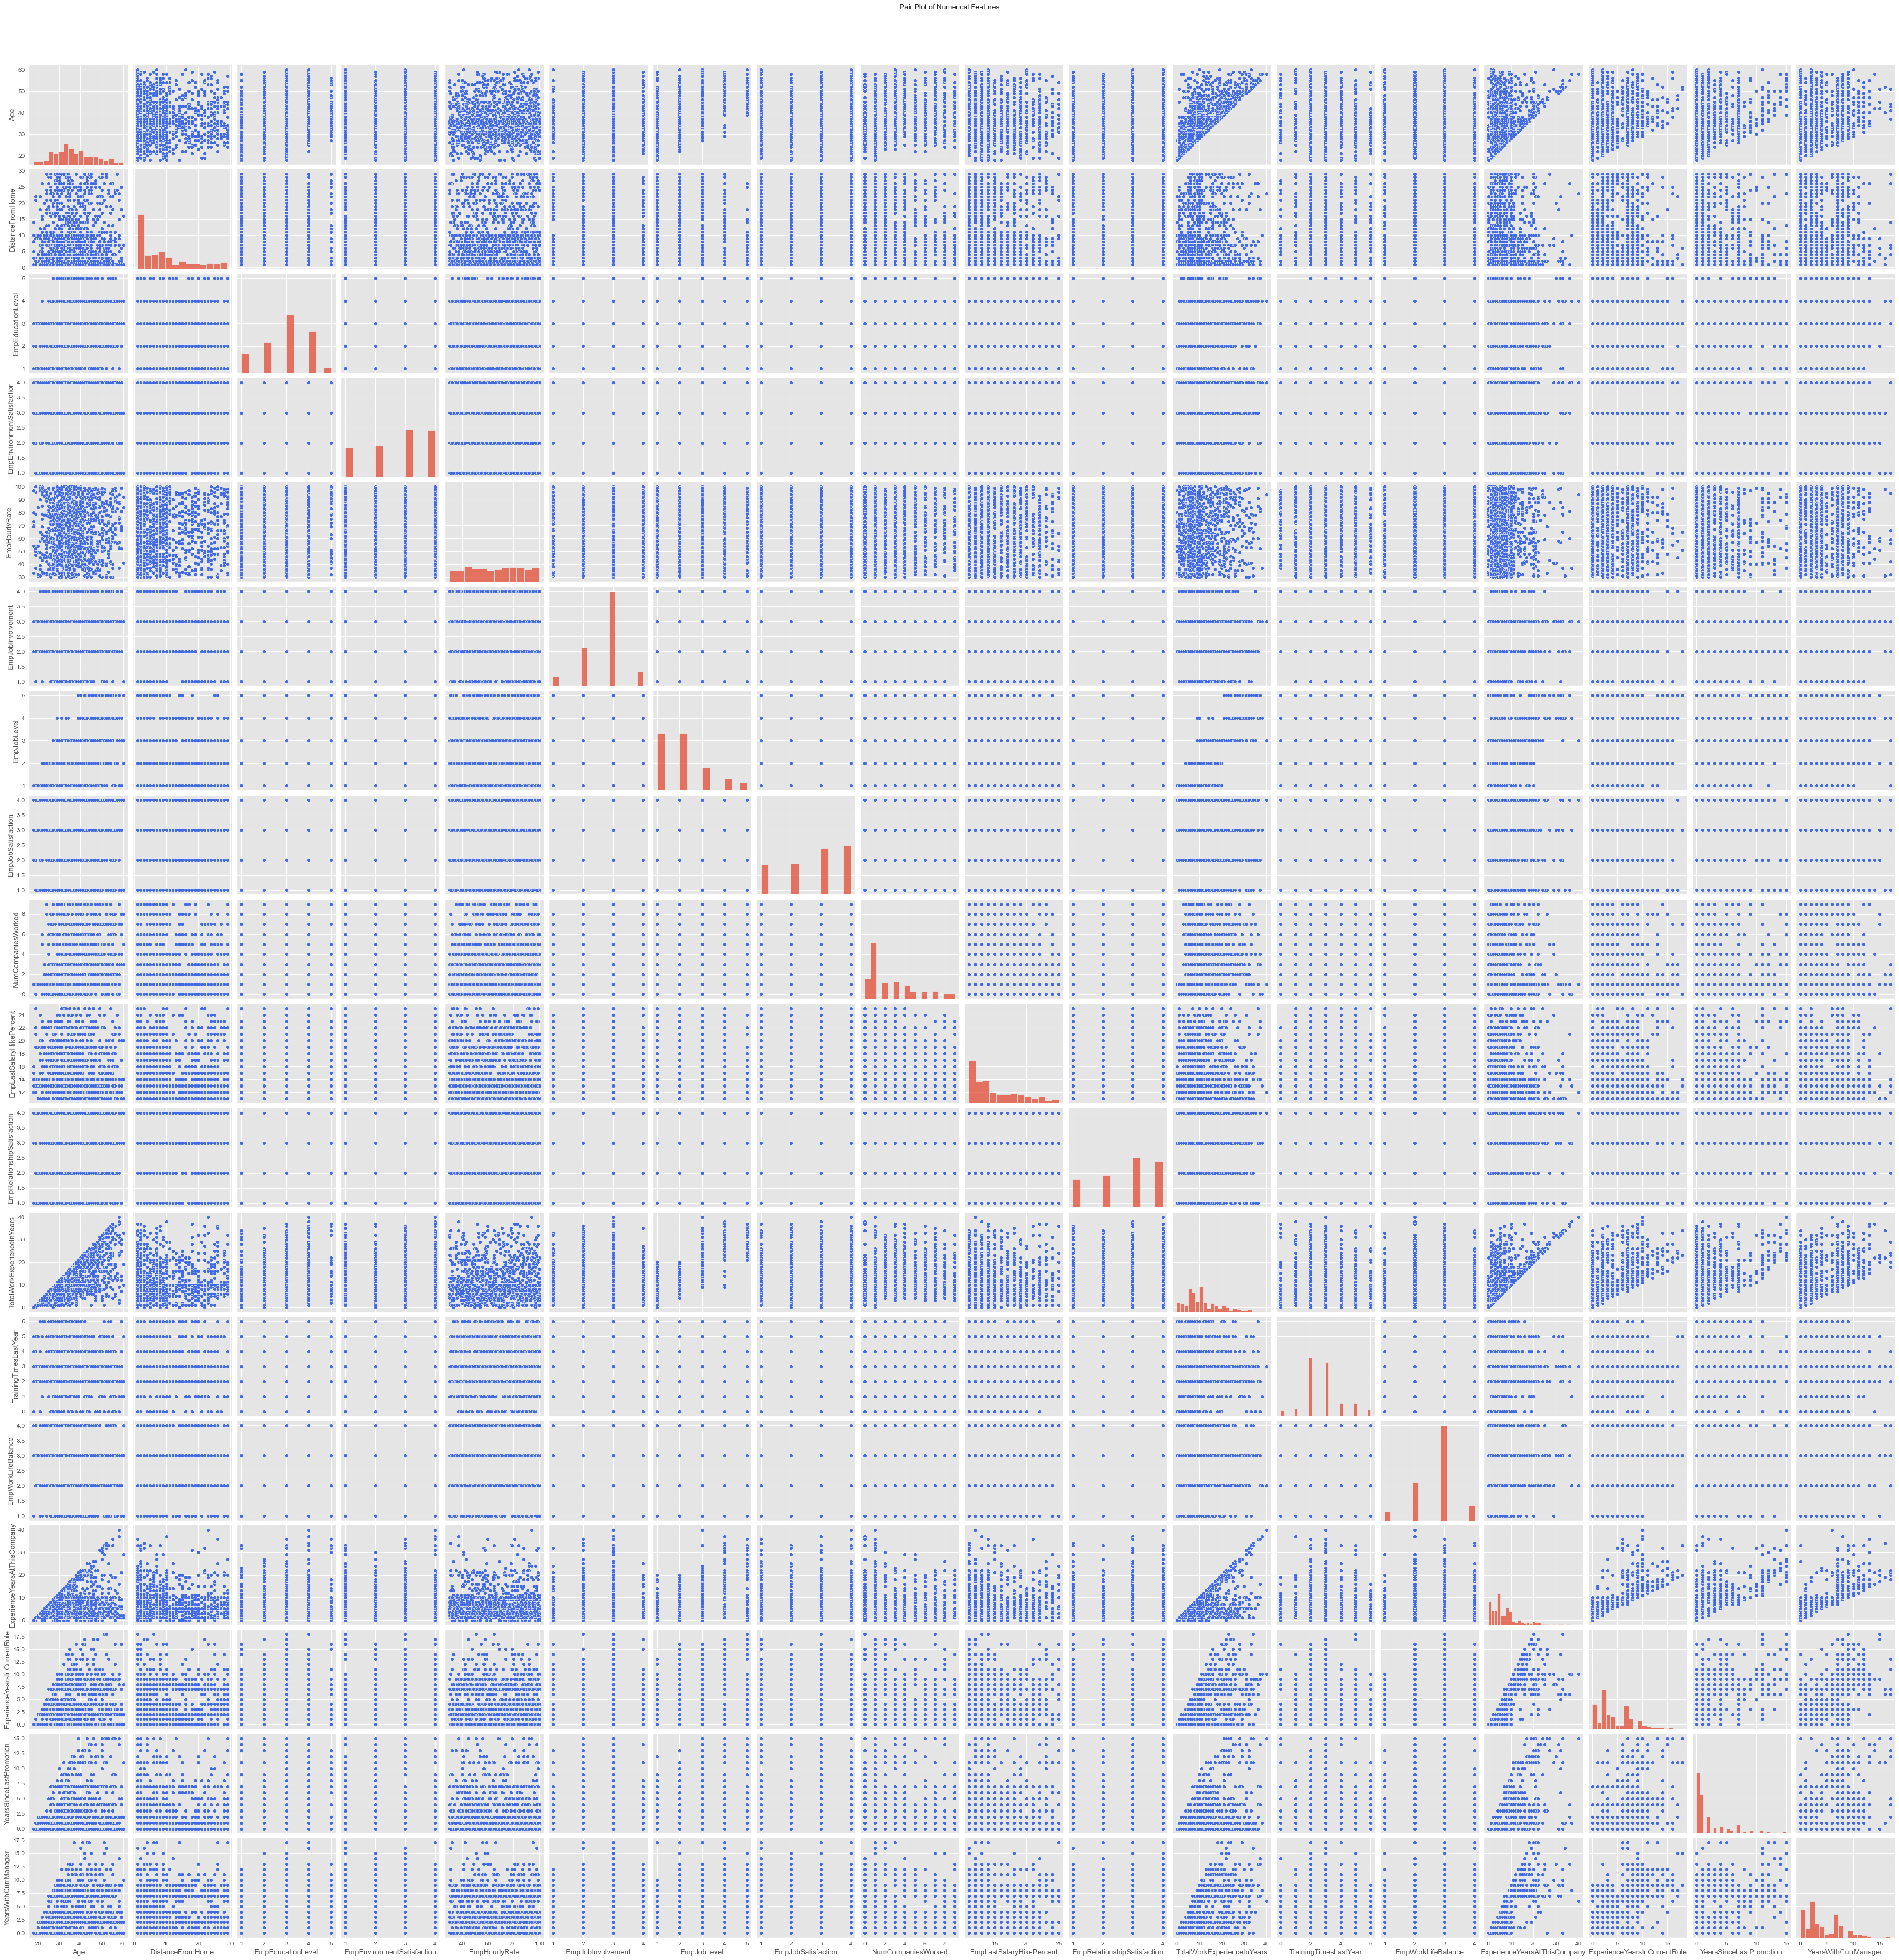

In [20]:
# Pairplot for numerical features
# Create the pair plot

# Select only the numerical features from the DataFrame
numerical_data = df[numerical_features]  # Extracts columns specified in numerical_features from df and stores them in numerical_data.

# Create the pair plot for numerical features
pairplot = sns.pairplot(numerical_data, plot_kws={'color': 'royalblue'})  
# Generates a grid of scatter plots for each pair of numerical features, with points colored 'royalblue'.

# Add a title 
plt.suptitle('Pair Plot of Numerical Features', y=1.02)  
# Adds a title above the pair plot, with y=1.02 adjusting the vertical position slightly above the plot.

# Save the plot
pairplot_path = os.path.join(save_dir, 'pair_plot.png')  
# Constructs the path where the plot will be saved by joining the directory save_dir with the file name 'pair_plot.png'.
pairplot.savefig(pairplot_path)  
# Saves the pair plot to the specified path.

# Show the plot
plt.show()  # Displays the pair plot.



- **Scatter Plot Matrix**:
    - A pairplot creates a matrix of scatter plots, where each subplot represents the relationship between a pair of numerical variables. 
    - Each cell in the matrix shows the scatter plot for one pair of variables, and the diagonal cells typically show histograms or density plots for each individual variable.
- **Visualization of Relationships**:
    - By visualizing the relationships between each pair of numerical variables, a pairplot helps in identifying patterns, trends, and potential correlations or lack thereof.
- **Color and Styling**:
    - Pairplots can include color coding to differentiate between categories or groups within the data, enhancing the interpretability of the plot.

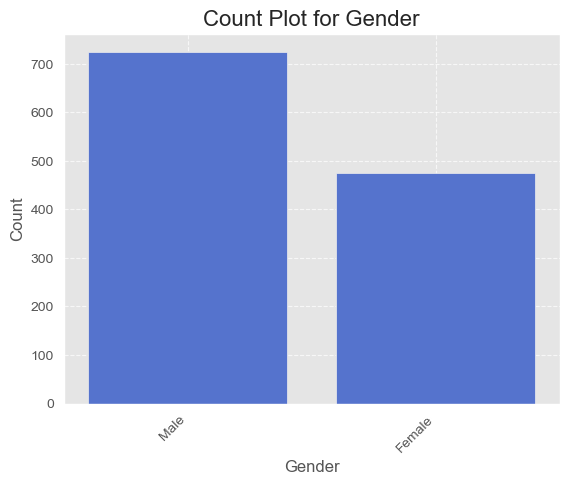

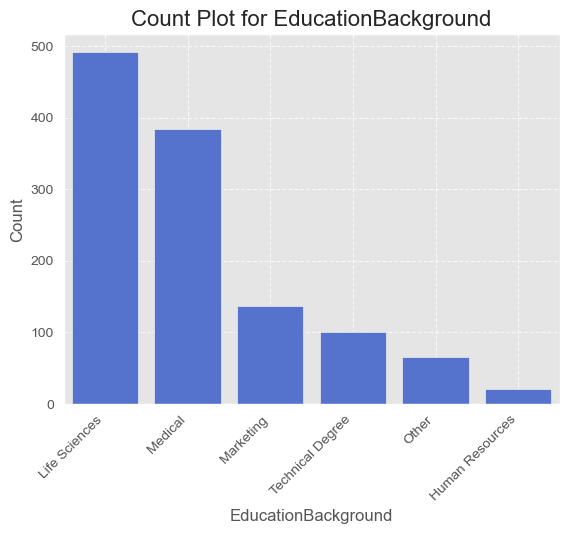

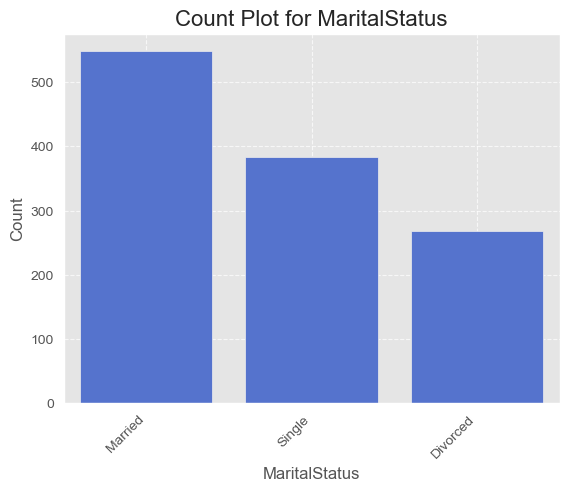

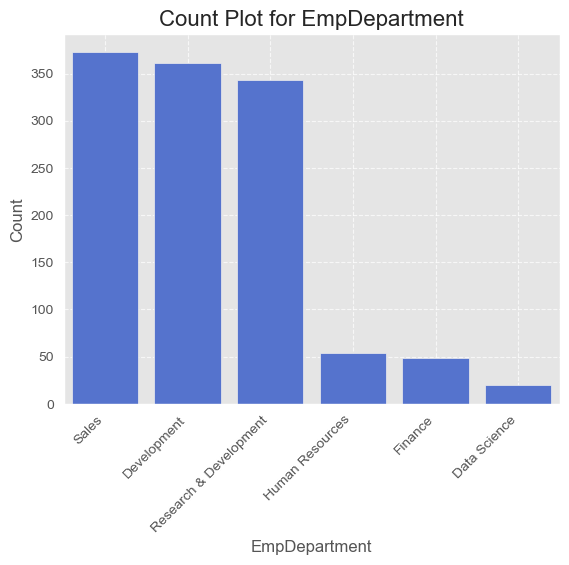

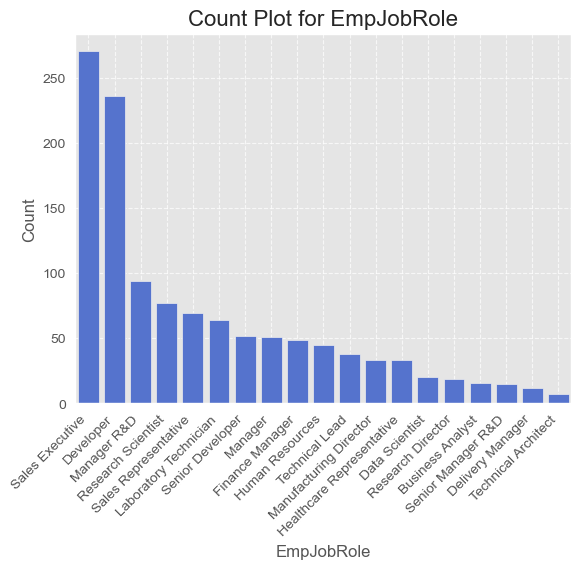

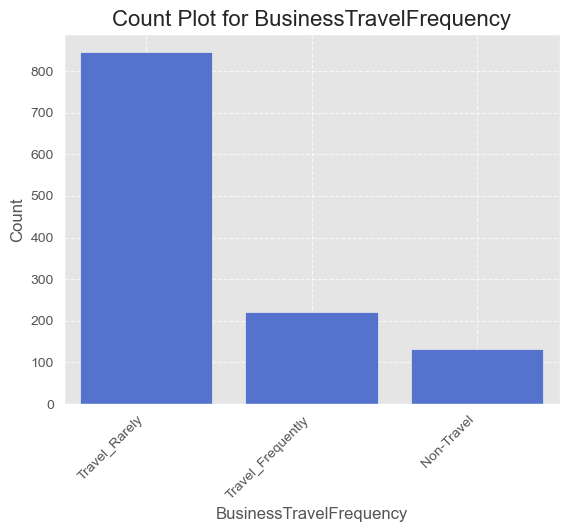

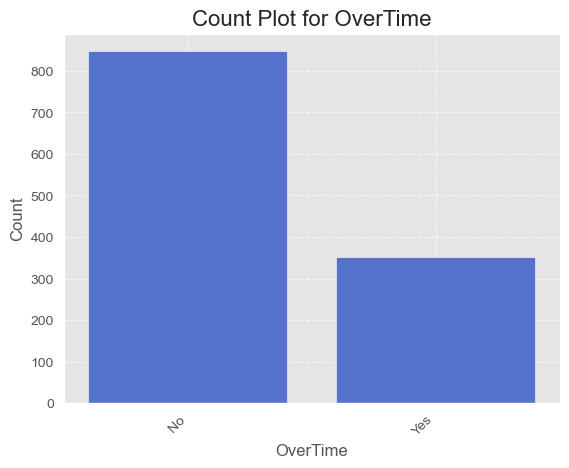

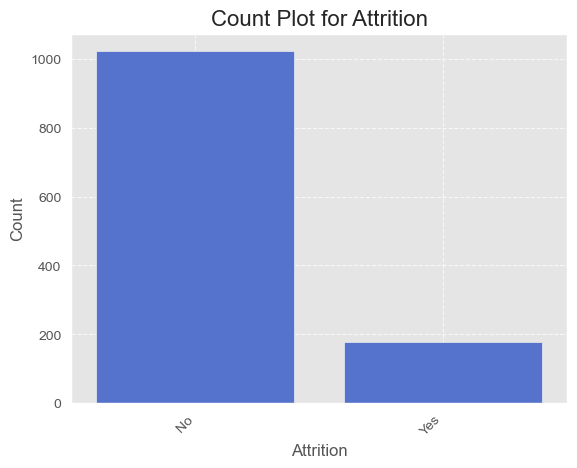

In [21]:
# Frequency plots for categorical features
# File Name: visualize.ipynb

# Ensure the directory exists
save_dir = './src/visualization'
os.makedirs(save_dir, exist_ok=True)  # Creates the directory 'src/visualization' if it does not exist

# Select categorical features from the DataFrame
categorical_features = df.select_dtypes(include=['object']).columns  # Retrieves all categorical columns from the DataFrame

# Iterate through each categorical feature
for col in categorical_features:
    # Get count of each category and sort in descending order
    count_data = df[col].value_counts().sort_values(ascending=False)  # Counts occurrences of each category in the column and sorts them
    
    # Create a DataFrame from the sorted counts
    sorted_data = pd.DataFrame(count_data).reset_index()  # Converts the count data into a DataFrame
    sorted_data.columns = [col, 'Count']  # Renames columns for better clarity
    
    # Create the plot
    # plt.figure(figsize=(10, 6))  # Uncomment to set figure size if needed
    sns.barplot(x=col, y='Count', color='royalblue', data=sorted_data)  # Creates a bar plot of the sorted counts
    
    # Add titles and labels
    plt.title(f'Count Plot for {col}', fontsize=16)  # Sets the title of the plot
    plt.xlabel(col, fontsize=12)  # Labels the x-axis
    plt.ylabel('Count', fontsize=12)  # Labels the y-axis
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45, ha='right')  # Rotates x-axis labels for better readability
    
    # Show grid
    plt.grid(True, linestyle='--', alpha=0.7)  # Adds a grid to the plot for better readability
    
    # Save the plot
    plot_path = os.path.join(save_dir, f'{col}_count_plot.png')  # Defines the path to save the plot
    plt.savefig(plot_path)  # Saves the plot to the specified path
    
    # Show the plot
    plt.show()  # Displays the plot


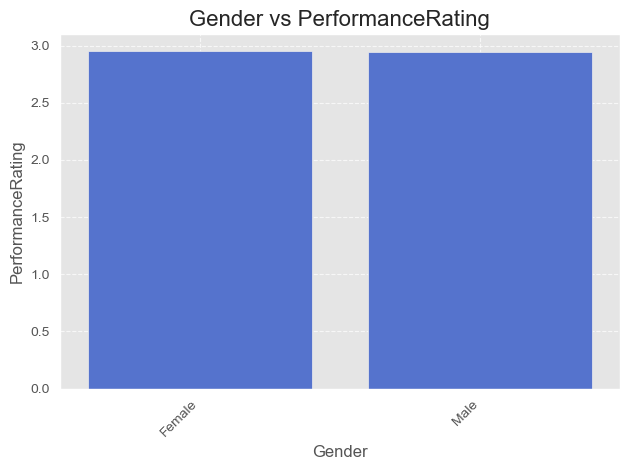

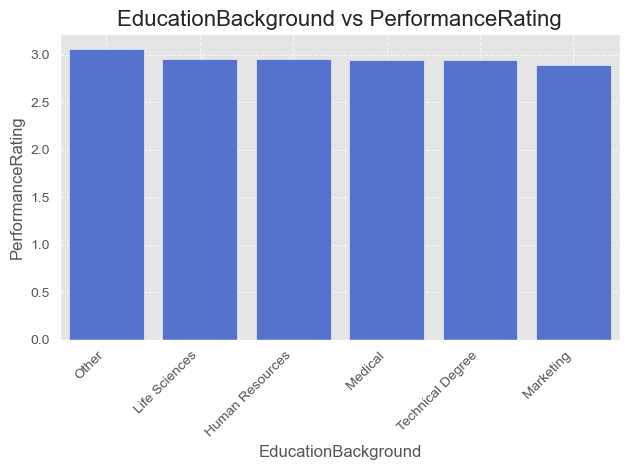

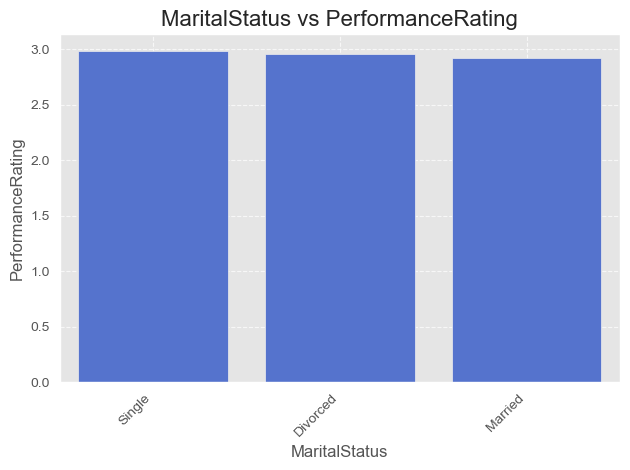

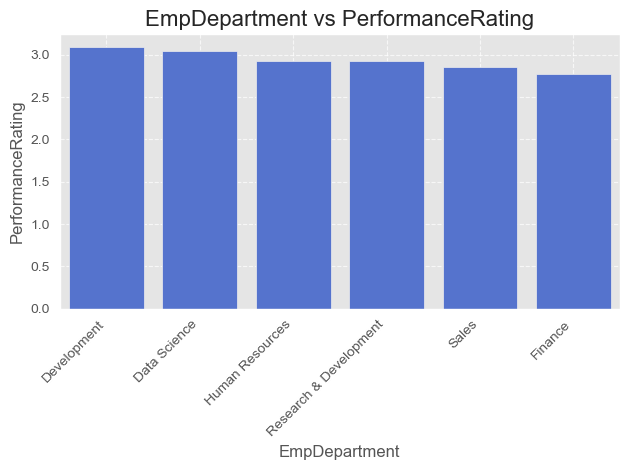

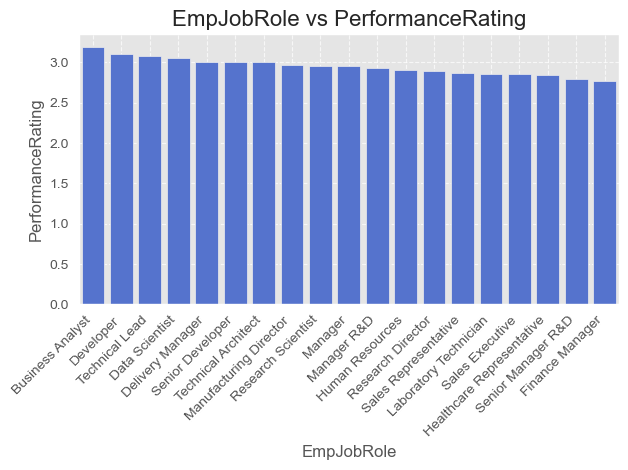

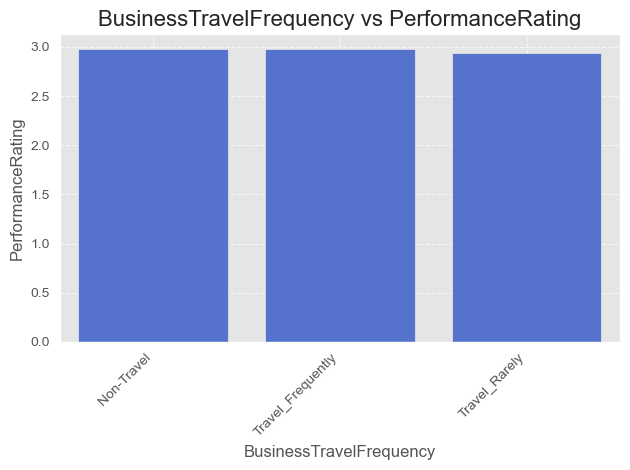

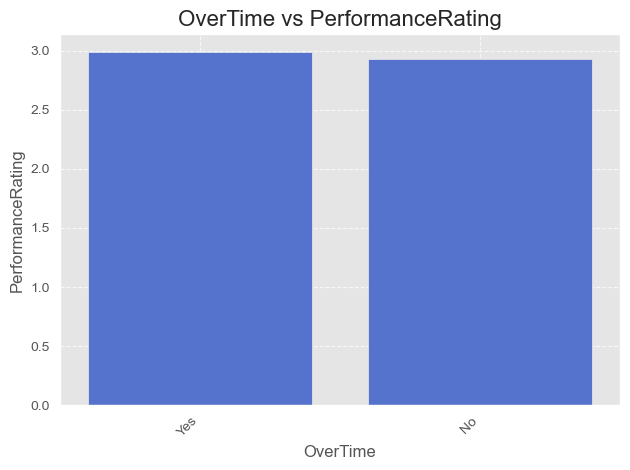

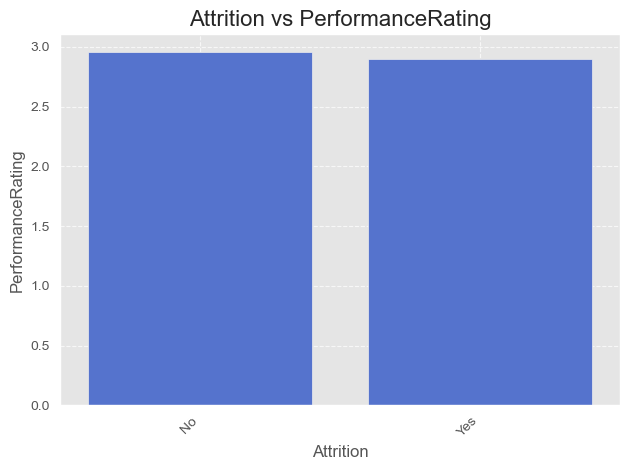

In [22]:
# Frequency plots for categorical features vs Performance Rating
# File Name: visualize.ipynb

# Ensure the directory exists
save_dir = './src/visualization'
os.makedirs(save_dir, exist_ok=True)  # Creates the directory 'src/visualization' if it does not already exist

# Define categorical features and the performance rating column
categorical_features = df.select_dtypes(include=['object']).columns  # Selects all categorical columns from the DataFrame
performance_rating = 'PerformanceRating'  # Defines the column name for the performance rating

# Iterate through each categorical feature
for col in categorical_features:
    # plt.figure(figsize=(10, 6))  # Uncomment to set figure size if needed
    
    # Aggregate the performance rating by the categorical feature
    aggregated_data = df.groupby(col)[performance_rating].mean().reset_index()  # Calculates the mean performance rating for each category
    # Sort the data in descending order of the performance rating
    sorted_data = aggregated_data.sort_values(by=performance_rating, ascending=False)  # Sorts the aggregated data by the mean performance rating
    
    # Create a bar plot with sorted data
    sns.barplot(x=col, y=performance_rating, data=sorted_data, color='royalblue')  # Creates a bar plot with the sorted data
    
    # Add titles and labels
    plt.title(f'{col} vs {performance_rating}', fontsize=16)  # Sets the title of the plot
    plt.xlabel(col, fontsize=12)  # Labels the x-axis
    plt.ylabel(performance_rating, fontsize=12)  # Labels the y-axis
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45, ha='right')  # Rotates x-axis labels for better readability
    
    # Show grid
    plt.grid(True, linestyle='--', alpha=0.7)  # Adds a grid to the plot for better readability
    
    # Adjust layout to fit labels and titles
    plt.tight_layout()  # Adjusts layout to ensure titles and labels fit within the figure
    
    # Save the plot
    plot_path = os.path.join(save_dir, f'{col}_vs_{performance_rating}.png')  # Defines the file path for saving the plot
    plt.savefig(plot_path)  # Saves the plot to the specified path
    
    # Show the plot
    plt.show()  # Displays the plot


## 3.2 Correlation Analysis

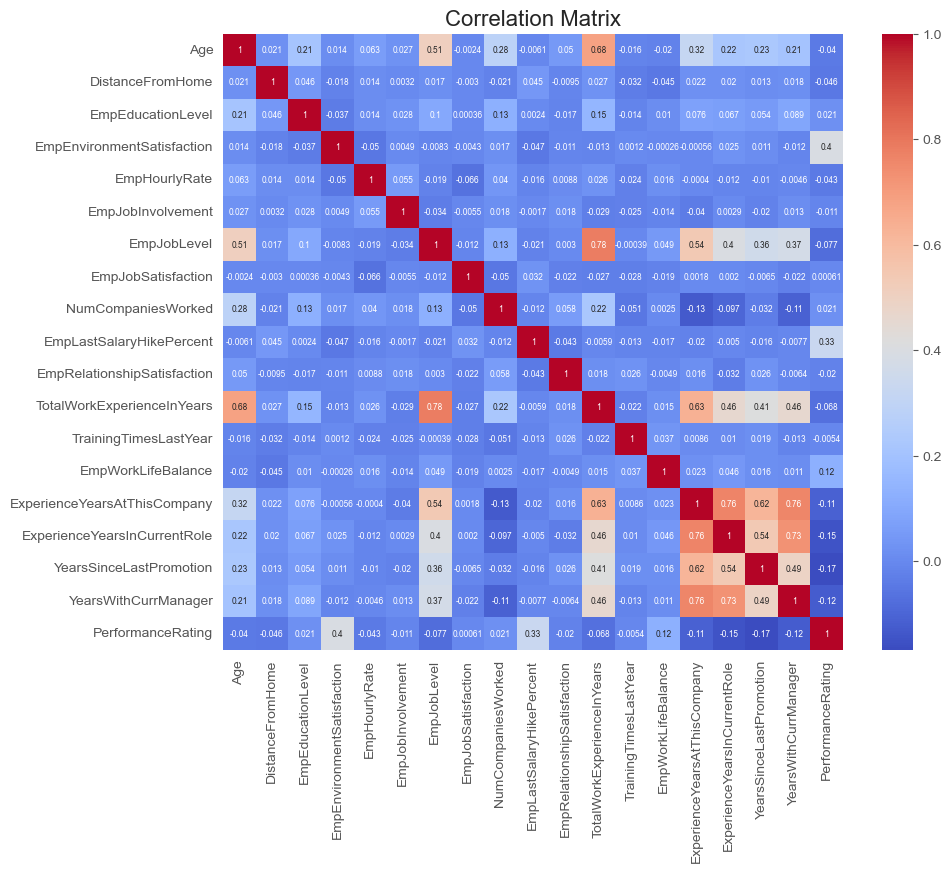

In [23]:
# Correlation Matrix

# Ensure the directory exists
save_dir = './src/visualization'
os.makedirs(save_dir, exist_ok=True)  # Creates the directory 'src/visualization' if it doesn't already exist

# Select numerical features for correlation matrix
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
# Selects columns with numerical data types (integer and float) from the DataFrame

# Correlation matrix
corr_matrix = df[numerical_features].corr()  # Calculates the correlation matrix for numerical features

# Create the heatmap
plt.figure(figsize=(10, 8))  # Sets the size of the figure for the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6})
# Creates a heatmap of the correlation matrix
# 'annot=True' adds the correlation values to the heatmap cells
# 'cmap='coolwarm'' sets the color map for the heatmap
# 'annot_kws={"size": 6}' adjusts the font size of the annotations

# Add title
plt.title('Correlation Matrix', fontsize=16)  # Sets the title of the heatmap

# Save the plot
plt.savefig(os.path.join(save_dir, 'correlation_matrix.png'))  # Saves the heatmap to the specified file path

# Show the plot
plt.show()  # Displays the heatmap


# 4. Data Preprocessing and Feature Engineering
* File: `data_exploratory_analysis.ipynb`
* **Purpose**: To further clean and prepare data, particularly focusing on feature engineering and transforming the target variable.

* Steps:

    * _Target Variable Transformation_: Rename PerformanceRating to Target.
    * _Feature Scaling_: Normalize or standardize numerical features.
    * _Encoding Categorical Variables_: Apply label encoding or one-hot encoding to categorical variables.

## 4.1 Feature Engineering

In [24]:
# Import libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# Imports preprocessing tools from scikit-learn:
# - LabelEncoder: Converts categorical labels into numeric labels.
# - OneHotEncoder: Converts categorical features into a one-hot encoded format.
# - StandardScaler: Standardizes features by removing the mean and scaling to unit variance.

from sklearn.compose import ColumnTransformer
# Imports ColumnTransformer from scikit-learn, which allows for different preprocessing steps on different columns of the dataset.

from sklearn.pipeline import Pipeline
# Imports Pipeline from scikit-learn, which helps to chain multiple preprocessing steps together in a single object.

from sklearn.impute import SimpleImputer
# Imports SimpleImputer from scikit-learn, which handles missing values by imputing them with a specified strategy (e.g., mean, median).

import pickle
# Imports the pickle module for serializing and deserializing Python objects, such as saving trained models to disk.


In [25]:
# Rename target variable
df.rename(columns={'PerformanceRating': 'Target'}, inplace=True)

#### Explanation:
- **`df.rename(columns={'PerformanceRating': 'Target'}, inplace=True)`**:
    - **`df.rename()`**: This function is used to rename one or more columns in a DataFrame.
    - **`columns={'PerformanceRating': 'Target'}`**: This argument specifies a dictionary where the keys are the current column names, and the values are the new column names. In this case, it means "PerformanceRating" will be renamed to "Target".
    - **`inplace=True`**: This parameter indicates that the operation should modify the DataFrame in place, meaning that it will not return a new DataFrame but will change the original DataFrame `df` directly.

#### What it does:
- This line of code renames the column `PerformanceRating` to `Target` in the DataFrame `df`.
- This is often done to clarify the role of a column, such as renaming it to reflect its role as the target variable in a machine learning model. In this case, `PerformanceRating` is being renamed to `Target` to indicate that this column will be used as the variable we are trying to predict or analyze.

In [26]:
# Separate features and target
X = df.drop(columns=['Target'], axis = 1)  # Drop the 'Target' column to create the features DataFrame X
y = df['Target']  # Extract the 'Target' column to create the target variable y


In [27]:
# Define numerical features in X
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()  # Identify numerical columns in X and convert to list

In [28]:
# Define categorical features in X
categorical_features = X.select_dtypes(include=['object']).columns.tolist()  # Identify categorical columns in X and convert to list


In [29]:
# Encode categorical features
label_encoders = {}  # Initialize a dictionary to store LabelEncoder objects for each categorical feature

# Loop through each categorical feature
for col in categorical_features:
    le = LabelEncoder()  # Create a new LabelEncoder object for the current feature
    X[col] = le.fit_transform(X[col])  # Fit and transform the categorical data into numeric labels
    label_encoders[col] = le  # Store the LabelEncoder object in the dictionary for later use


In [30]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Step 1: Impute missing values in numerical features with the median
            ('scaler', StandardScaler())  # Step 2: Scale numerical features to standardize them (mean = 0, variance = 1)
        ]), numerical_features),  # Apply this pipeline to numerical features
        
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Apply one-hot encoding to categorical features
    ])


In [31]:
# Apply the preprocessing pipeline to the dataset
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


- **`pipeline = Pipeline(steps=[ ... ])`**:
    - **`Pipeline`**: A scikit-learn class that helps in chaining multiple data processing steps together into a single workflow. It ensures that the transformations are applied in the correct sequence.
    - **`steps=[('preprocessor', preprocessor)]`**:
    - **`steps`**: A list of tuples, where each tuple represents a step in the pipeline. Each tuple contains:
        - **`'preprocessor'`**: A name (identifier) for this step. It's a string label that helps you identify the step in the pipeline.
        - **`preprocessor`**: The preprocessing object (defined earlier) that performs specific transformations on the dataset.

In [32]:
# Transform data
X_transformed = pipeline.fit_transform(X)

- **`X_transformed = pipeline.fit_transform(X)`**:
    - **`pipeline`**: This is the `Pipeline` object created earlier, which contains the preprocessing steps defined.
    - **`fit_transform(X)`**: This method is used to perform both fitting and transforming on the data:
        - **`fit`**: The `fit` method learns the parameters (such as the mean and standard deviation for scaling, or the encoding for categorical variables) from the training data.
        - **`transform`**: The `transform` method applies the learned parameters to the data, resulting in a processed dataset.
    - **`X`**: This is the input dataset that you want to preprocess. In this case, `X` contains the feature variables with both numerical and categorical data.
        - **`X_transformed`**: This variable stores the output of the `fit_transform` method, which is the preprocessed version of the original dataset `X`.
- The pipeline.fit_transform(X) call processes the data X by applying the transformations defined in the pipeline.
- The resulting X_transformed contains the processed features, ready for use in training a machine learning model or further analysis.

## 4.2 Saving the label encoders and preprocessor

In [33]:
# Save the label encoders
with open('./data/processed/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

- **`with open('data/processed/label_encoders.pkl', 'wb') as f:`**
    - **`open('data/processed/label_encoders.pkl', 'wb')`**: This line opens a file named `label_encoders.pkl` located in the `data/processed/` directory in write-binary mode (`'wb'`). If the directory or file doesn't exist, it will be created.
    - **`as f`**: This creates a file object named `f` that will be used to write data to the file.
- **`pickle.dump(label_encoders, f)`**
    - **`pickle.dump`**: This function serializes (converts to a byte stream) the Python object `label_encoders` and writes it to the file object `f`.
    - **`label_encoders`**: This is a dictionary containing `LabelEncoder` instances for each categorical feature.
    - Each encoder is used to transform categorical values into numeric values.
* The code saves the label_encoders dictionary to a file using Python's pickle module.
* This allows you to reload the label encoders later, preserving the encoding scheme used for categorical features and ensuring consistent preprocessing for future data.

In [34]:
# Save the preprocessor
with open('./data/processed/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

- **`with open('data/processed/preprocessor.pkl', 'wb') as f:`**
    - **`open('data/processed/preprocessor.pkl', 'wb')`**: This opens a file named `preprocessor.pkl` in the `data/processed/` directory in write-binary mode (`'wb'`). If the file or directory does not exist, it will be created.
    - **`as f`**: This creates a file object named `f` that you will use to write data to the file.
- **`pickle.dump(preprocessor, f)`**
    - **`pickle.dump`**: This function serializes (converts to a byte stream) the Python object `preprocessor` and writes it to the file object `f`.
    - **`preprocessor`**: This is an instance of `ColumnTransformer` that contains the preprocessing steps for the dataset, including numerical imputation, scaling, and categorical one-hot encoding.
#### Summary:
- The code saves the `preprocessor` object to a file using Python's `pickle` module.
- This allows you to reload the `preprocessor` later, ensuring that the same data preprocessing steps are applied consistently to new or additional data, maintaining the integrity of your data transformations.

# 5. Feature Selection and PCA
* File: `data_exploratory_analysis.ipynb`
* **Purpose**: To select the most important features for the model and reduce dimensionality.

* Steps:

    * _Feature Importance_: Use algorithms like Random Forest to determine feature importance.
    * _Principal Component Analysis (PCA)_: Reduce the dimensionality if needed.
    * _Saving Components_: Save selected features for later use.

## 5.1 Feature Importance

In [35]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import pickle
import pandas as pd

- **`import matplotlib.pyplot as plt`**
    - **`import matplotlib.pyplot`**: Imports the `pyplot` module from the `matplotlib` library, which is used for creating visualizations.
    - **`as plt`**: Aliases `pyplot` as `plt` for convenience, allowing you to call functions like `plt.plot()` or `plt.show()`.
- **`from sklearn.ensemble import RandomForestClassifier`**
    - **`from sklearn.ensemble`**: Imports modules from the `ensemble` subpackage of `scikit-learn`, which contains ensemble methods.
    - **`import RandomForestClassifier`**: Specifically imports the `RandomForestClassifier` class, which is used for classification tasks using the Random Forest algorithm.
- **`from sklearn.decomposition import PCA`**
    - **`from sklearn.decomposition`**: Imports modules from the `decomposition` subpackage of `scikit-learn`, which includes methods for dimensionality reduction.
    - **`import PCA`**: Specifically imports the `PCA` class, which performs Principal Component Analysis to reduce the number of features while retaining as much variance as possible.
-   **`from sklearn.feature_selection import SelectKBest, f_classif`**
    - **`from sklearn.feature_selection`**: Imports modules from the `feature_selection` subpackage of `scikit-learn`, which includes methods for selecting the best features.
    - **`import SelectKBest`**: Imports the `SelectKBest` class, which selects the top `k` features based on statistical tests.
    - **`import f_classif`**: Imports the `f_classif` function, which is a statistical test used by `SelectKBest` to evaluate the importance of features for classification tasks.
- **`import pickle`**
    - **`import pickle`**: Imports the `pickle` module, which is used for serializing and deserializing Python objects, such as saving trained models to files.
- **`import pandas as pd`**
    - **`import pandas`**: Imports the `pandas` library, which provides data structures and functions for data manipulation and analysis.
    - **`as pd`**: Aliases `pandas` as `pd` for convenience, allowing you to use functions like `pd.read_csv()` or `pd.DataFrame()`.

In [36]:
# Feature Selection using ANOVA F-test

# Initialize SelectKBest with ANOVA F-test and specify to select all features (k='all')
selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector to the data and transform X to get the scores of all features
X_new = selector.fit_transform(X, y)  # `X_new` will be the transformed data with all features, but the transformation here is primarily for scoring

# Get the scores of all features as determined by the ANOVA F-test
feature_scores = selector.scores_

# Get the column names of the original features
features = X.columns


In [37]:
# Create a DataFrame for feature importance

# Create a DataFrame using a dictionary with 'Feature' as column names and 'Score' as column scores
importance_df = pd.DataFrame({
    'Feature': features,  # Column with feature names
    'Score': feature_scores  # Column with feature importance scores
})

In [38]:
# Sort the DataFrame by scores in descending order

# Sort the DataFrame 'importance_df' by the 'Score' column in descending order
importance_df = importance_df.sort_values(by='Score', ascending=False)

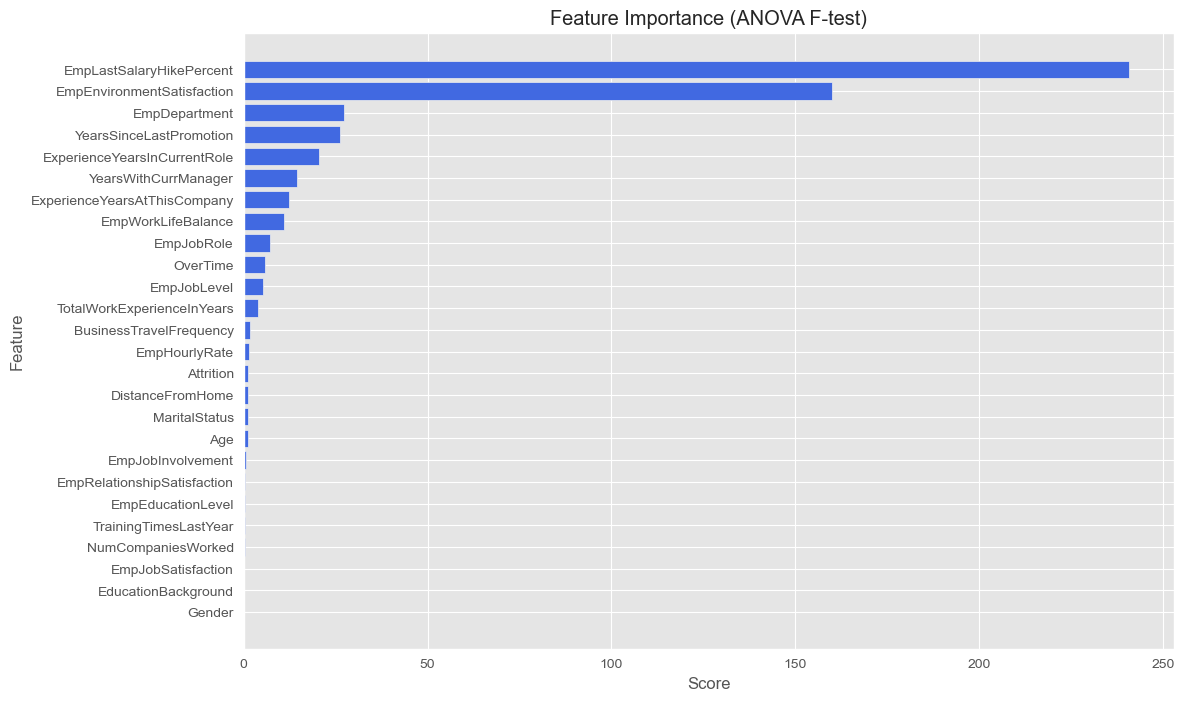

In [39]:
# Plot the feature importances

# Create a new figure with a specified size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot with features on the y-axis and their scores on the x-axis
plt.barh(importance_df['Feature'], importance_df['Score'], color='royalblue')

# Apply the 'ggplot' style for the plot
plt.style.use('ggplot')

# Label the x-axis as 'Score'
plt.xlabel('Score')

# Label the y-axis as 'Feature'
plt.ylabel('Feature')

# Set the title of the plot
plt.title('Feature Importance (ANOVA F-test)')

# Invert the y-axis to have the highest scores at the top
plt.gca().invert_yaxis()

# Save the plot
plt.savefig(os.path.join(save_dir, 'feature_importance_ANOVA.png'))  

# Display the plot
plt.show()


In [40]:
# Select top 8 features
top_features_df = importance_df.head(8)  # Get the top 8 rows of the DataFrame based on feature importance scores
top_features = top_features_df['Feature'].values  # Extract the feature names of the top 8 features


In [41]:
print("Top 8 Selected Features:")
print(top_features_df)

Top 8 Selected Features:
                         Feature       Score
16      EmpLastSalaryHikePercent  240.837433
9     EmpEnvironmentSatisfaction  159.861194
4                  EmpDepartment   27.263331
23       YearsSinceLastPromotion   26.217197
22  ExperienceYearsInCurrentRole   20.505445
24          YearsWithCurrManager   14.641569
21  ExperienceYearsAtThisCompany   12.384997
20            EmpWorkLifeBalance   11.056744


In [42]:
# Considering X is the original feature set

# Subset the original data to include only the top 8 features and the target
X_top_features = X[top_features]  # Select only the columns corresponding to the top 8 features from the original feature set X

# Concatenate the subset of features with the target variable into a single DataFrame
processed_data = pd.concat([X_top_features, y], axis=1)  # Combine X_top_features and y along the columns to create a DataFrame with only top features and the target


In [43]:
# Save the top 8 feature names
with open('./data/processed/trained_feature_names.pkl', 'wb') as f:  # Open a file for writing binary data
    pickle.dump(top_features, f)  # Serialize and write the top_features array to the file

## 5.2 Dimensionality Reduction 
* PCA and Cumulative Variance Plot

In [44]:
# Apply PCA to the top features
pca = PCA()  # Create an instance of PCA (Principal Component Analysis)
X_pca = pca.fit_transform(X_top_features)  # Fit PCA on the selected top features and transform the data

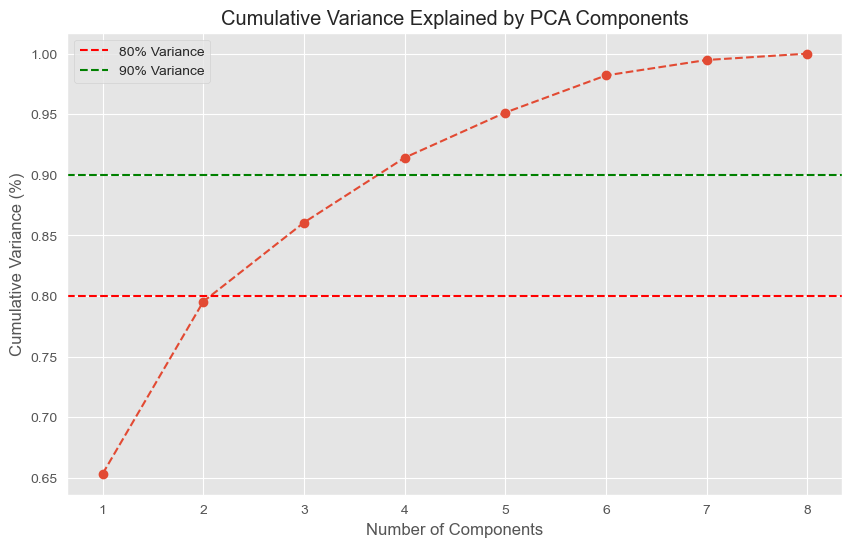

In [45]:
# Cumulative variance plot
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10x6 inches
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
# Plot cumulative variance explained by PCA components
# `range(1, len(pca.explained_variance_ratio_) + 1)`: X-axis values (number of components)
# `pca.explained_variance_ratio_.cumsum()`: Y-axis values (cumulative explained variance ratio)
# `marker='o'`: Mark each point with a circle
# `linestyle='--'`: Use dashed lines to connect the points

plt.title('Cumulative Variance Explained by PCA Components')  # Set the plot title
plt.xlabel('Number of Components')  # Set the label for the X-axis
plt.ylabel('Cumulative Variance (%)')  # Set the label for the Y-axis
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance')  # Add a horizontal line at 80% variance
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')  # Add a horizontal line at 90% variance
plt.grid(True)  # Enable grid for better readability
plt.legend()  # Add a legend to the plot
plt.savefig('./src/visualization/pca_cumulative_variance.png')  # Save the plot as a PNG file


In [46]:
# Calculate cumulative variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

- **`pca.explained_variance_ratio_`**: This attribute of the PCA object contains an array of variance ratios for each principal component. 
   - Each value represents the proportion of the dataset's variance that is captured by each corresponding principal component.
- **`.cumsum()`**: This method computes the cumulative sum of the array values. For the PCA explained variance ratios, this means it calculates the cumulative variance explained by the principal components up to each point. For example, if the first two components explain 40% and 25% of the variance respectively, the cumulative variance explained by the first two components will be 65%.
- **`cumulative_variance`**: The resulting variable stores the cumulative variance explained by the principal components. 
   - It shows how the total explained variance grows as more principal components are included.

In [47]:
# Determine the number of components to reach at least 90% variance
n_components = next(i for i, cumulative_variance in enumerate(cumulative_variance) if cumulative_variance >= 0.80) + 1


- **`enumerate(cumulative_variance)`**: This function generates pairs of index and value from the `cumulative_variance` array. The index represents the component number (starting from 0), and the value represents the cumulative variance explained by that number of components.
    - **`next(i for i, cumulative_variance in enumerate(cumulative_variance) if cumulative_variance >= 0.80)`**: This generator expression iterates over the enumerated `cumulative_variance`. It returns the index `i` where the cumulative variance first reaches or exceeds 0.80 (80%). The `next` function retrieves this index.
    - **`+ 1`**: Since Python uses zero-based indexing (i.e., the first component is index 0), adding 1 adjusts the count to reflect the number of components in a one-based index system.
    - **`n_components`**: This variable holds the number of principal components required to explain at least 90% of the variance in the data. This number is used to reduce the dataset's dimensionality while retaining a high proportion of the variance.

In [48]:
# Print the number of components and variance explained
print(f"Number of components selected to explain at least 80% variance: {n_components}")


Number of components selected to explain at least 80% variance: 3


In [49]:
# Print explained variance ratio for each component

# Print a header for clarity
print("\nExplained variance ratio for each component:")

# Iterate over each component and its explained variance ratio
for i, variance in enumerate(pca.explained_variance_ratio_):
    # Print the component index (1-based) and its variance ratio formatted to four decimal places
    print(f"Component {i+1}: {variance:.4f}")



Explained variance ratio for each component:
Component 1: 0.6535
Component 2: 0.1420
Component 3: 0.0652
Component 4: 0.0535
Component 5: 0.0373
Component 6: 0.0306
Component 7: 0.0127
Component 8: 0.0052


In [50]:
# Print cumulative variance ratio

# Print a header to indicate the following output is about cumulative explained variance ratios
print("\nCumulative explained variance ratio:")

# Iterate over each cumulative variance ratio and its index
for i, variance in enumerate(cumulative_variance):
    # Print the index of the component (starting from 1 for readability) and the cumulative variance ratio up to that component
    print(f"Up to component {i+1}: {variance:.4f}")



Cumulative explained variance ratio:
Up to component 1: 0.6535
Up to component 2: 0.7955
Up to component 3: 0.8607
Up to component 4: 0.9141
Up to component 5: 0.9514
Up to component 6: 0.9820
Up to component 7: 0.9948
Up to component 8: 1.0000


In [51]:
# Reapply PCA with the selected number of components
pca = PCA(n_components=n_components)  # Initialize PCA with the number of components determined
X_pca = pca.fit_transform(X_top_features)  # Apply PCA to the selected features and transform the data


In [52]:
# Save PCA model
with open('./data/processed/pca_model.pkl', 'wb') as f:  # Open a file in write-binary mode
    pickle.dump(pca, f)  # Serialize and save the PCA model to the file

**`pickle.dump(pca, f)`**:
- **`pickle.dump(pca, f)`**: Serializes the PCA model object (`pca`) and writes it to the file `f`. 
-  This allows you to save the PCA model so that it can be loaded and used later without needing to recompute it.

## 5.3 Feature Selection with Correlation Score

In [53]:
# Map metadata to numerical values for relevant columns
metadata_mapping = {
    'Gender': {'Female': 0, 'Male': 1},
    'EducationBackground': {'Marketing': 0, 'Life Sciences':1, 'Human Resources':2,'Medical':3,'Technical Degree':4,'Other':5},
    'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2},
    'EmpDepartment': {'Sales': 0, 'Human Resources': 1, 'Development': 2, 'Data Science': 3, 'Research & Development': 4, 'Finance': 5},
    'EmpJobRole': {'Sales Executive': 0, 'Manager': 1, 'Developer': 2,'Sales Representative': 3, 'Human Resources': 4, 'Senior Developer': 5,
                      'Data Scientist': 6,'Senior Manager R&D': 7, 'Laboratory Technician': 8, 'Manufacturing Director': 9, 'Research Scientist': 10, 
                      'Healthcare Representative': 11, 'Research Director': 12, 'Manager R&D': 13, 'Finance Manager': 14, 'Technical Architect': 15,
                      'Business Analyst': 16, 'Technical Lead': 17, 'Delivery Manager': 18},
    'BusinessTravelFrequency': {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2},
    'OverTime': {'No': 0, 'Yes': 1},
    'Attrition': {'No': 0, 'Yes': 1},
    
    
    
}

# Apply the mapping to convert categorical columns to numerical
for column, mapping in metadata_mapping.items():
    df[column] = df[column].map(mapping)


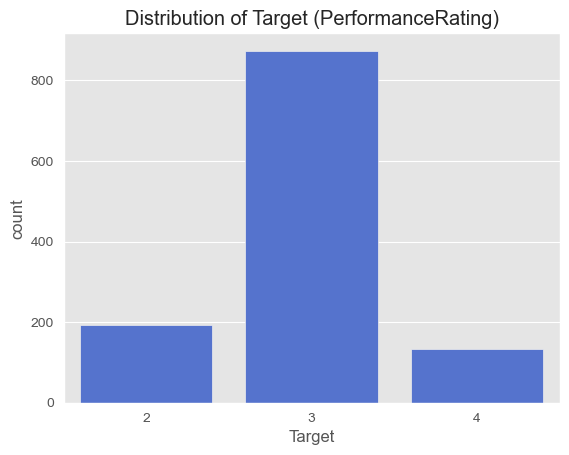

In [54]:
# Confirm the distribution of the target variable 'Target'
# File Name: visualize.ipynb

sns.countplot(x='Target', data=df, color= 'royalblue')
plt.title('Distribution of Target (PerformanceRating)')
plt.show()

In [55]:
# Assess for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant column to the DataFrame if not already present
X_with_const = add_constant(X)

# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Sort the DataFrame by VIF in descending order
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data_sorted)
# No feature has a VIF value > 10 hence no multicollinearity. Thus, all features can be used in subsequent models to predict the Target variable.

                         Feature         VIF
0                          const  140.106066
19    TotalWorkExperienceInYears    4.775479
22  ExperienceYearsAtThisCompany    4.615166
23  ExperienceYearsInCurrentRole    2.861893
25          YearsWithCurrManager    2.760402
13                   EmpJobLevel    2.729961
1                            Age    2.074312
24       YearsSinceLastPromotion    1.674811
5                  EmpDepartment    1.553665
6                     EmpJobRole    1.517492
15            NumCompaniesWorked    1.274354
26                     Attrition    1.266684
16                      OverTime    1.101656
9              EmpEducationLevel    1.067780
4                  MaritalStatus    1.058385
12             EmpJobInvolvement    1.048796
10    EmpEnvironmentSatisfaction    1.046411
14            EmpJobSatisfaction    1.030492
18   EmpRelationshipSatisfaction    1.028149
21            EmpWorkLifeBalance    1.027678
7        BusinessTravelFrequency    1.025260
11        

In [56]:
# Reorder columns to have 'Target' as the first column
columns = ['Target'] + [col for col in df.columns if col != 'Target']
df_reordered = df[columns]

# Check for the correlation scores

df_reordered.corr()

Target       Age    Gender  \
Target                        1.000000 -0.040164 -0.001780   
Age                          -0.040164  1.000000 -0.040107   
Gender                       -0.001780 -0.040107  1.000000   
EducationBackground           0.032630 -0.073079  0.022009   
MaritalStatus                -0.024172  0.098368  0.042169   
EmpDepartment                 0.023695  0.032231  0.020296   
EmpJobRole                    0.003858  0.025341  0.026363   
BusinessTravelFrequency       0.031025 -0.040579  0.043608   
DistanceFromHome             -0.046142  0.020937 -0.001507   
EmpEducationLevel             0.020529  0.207313 -0.022960   
EmpEnvironmentSatisfaction    0.395561  0.013814  0.000033   
EmpHourlyRate                -0.043116  0.062867  0.002218   
EmpJobInvolvement            -0.010539  0.027216  0.010949   
EmpJobLevel                  -0.076632  0.509139 -0.050685   
EmpJobSatisfaction            0.000606 -0.002436  0.024680   
NumCompaniesWorked            0.020980  0.284408 -0.036675   
OverTime                      0.050206  0.051910 -0.038410   
EmpLastSalaryHikePercent      0.333722 -0.006105 -0.005319   
EmpRelationshipSatisfaction  -0.019502  0.049749  0.030707   
TotalWorkExperienceInYears   -0.068141  0.680886 -0.061055   
TrainingTimesLastYear        -0.005443 -0.016053 -0.057654   
EmpWorkLifeBalance            0.124429 -0.019563  0.015793   
ExperienceYearsAtThisCompany -0.111645  0.318852 -0.030392   
ExperienceYearsInCurrentRole -0.147638  0.217163 -0.031823   
YearsSinceLastPromotion      -0.167629  0.228199 -0.021575   
YearsWithCurrManager         -0.122313  0.205098 -0.036643   
Attrition                    -0.039796 -0.189317  0.035758   

                              EducationBackground  MaritalStatus  \
Target                                   0.032630      -0.024172   
Age                                     -0.073079       0.098368   
Gender                                   0.022009       0.042169   
EducationBackground                      1.000000       0.022935   
MaritalStatus                            0.022935       1.000000   
EmpDepartment                            0.269240       0.042913   
EmpJobRole                               0.184887       0.036401   
BusinessTravelFrequency                  0.015149       0.028520   
DistanceFromHome                        -0.025187       0.019148   
EmpEducationLevel                       -0.054159      -0.026737   
EmpEnvironmentSatisfaction               0.049301       0.032467   
EmpHourlyRate                           -0.046051       0.013540   
EmpJobInvolvement                       -0.003909       0.043355   
EmpJobLevel                             -0.087519       0.087359   
EmpJobSatisfaction                      -0.016389      -0.044593   
NumCompaniesWorked                      -0.021796       0.030095   
OverTime                                 0.015839       0.022833   
EmpLastSalaryHikePercent                 0.002177      -0.010128   
EmpRelationshipSatisfaction             -0.000874      -0.026410   
TotalWorkExperienceInYears              -0.038663       0.093537   
TrainingTimesLastYear                    0.053193      -0.026045   
EmpWorkLifeBalance                       0.016034      -0.014154   
ExperienceYearsAtThisCompany            -0.029215       0.075728   
ExperienceYearsInCurrentRole            -0.026275       0.076663   
YearsSinceLastPromotion                  0.002898       0.052951   
YearsWithCurrManager                    -0.019184       0.061908   
Attrition                               -0.018786      -0.162969   

                              EmpDepartment  EmpJobRole  \
Target                             0.023695    0.003858   
Age                                0.032231    0.025341   
Gender                             0.020296    0.026363   
EducationBackground                0.269240    0.184887   
MaritalStatus                      0.042913    0.036401   
EmpDepartment                      1

In [57]:
# Calculate the correlation matrix with the target
corr_matrix = pd.concat([X, y], axis=1).corr()

# Feature selection using correlation with the target
correlation_threshold = 0.1  # Adjust this threshold based on your needs

# Get features with high correlation to Target
correlated_features = corr_matrix.index[abs(corr_matrix["Target"]) > correlation_threshold]

# Ensure 'Target' is not included in the selected features
if 'Target' in correlated_features:
    correlated_features = correlated_features.drop('Target')

# Selecting features with high correlation to Target
X_selected = X[correlated_features]

print("Selected features:\n", X_selected.columns)

Selected features:
 Index(['EmpDepartment', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [58]:
# Add the target column back to the selected features DataFrame
selected_data = X_selected.copy()
selected_data['Target'] = y

# Save the selected features and target to a CSV file
save_path = './data/processed/selecteddata.csv'
selected_data.to_csv(save_path, index=False)

print("Selected features saved to:", save_path)
print("Selected features:\n", X_selected.columns)

Selected features saved to: ./data/processed/selecteddata.csv
Selected features:
 Index(['EmpDepartment', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


# 6. Model Building, Tuning, Training and Validation
* File: `train_model.ipynb`
* **Purpose**: To build various machine learning models and prepare them for evaluation.

* Steps:

    * _Model Implementation_: Train multiple models (e.g., Logistic Regression, Decision Tree, Random Forest).
    * _Hyperparameter Tuning_: Use GridSearchCV or RandomizedSearchCV for tuning.
    * _Cross-Validation_: Implement cross-validation for model robustness.
    * _Model Validation_: Generate the classification report and model metrics to signify model performance.
    * _Compare Model Performance_
                                                                     

## 6.1 Import libraries and load the data

In [59]:
# Import libraries

# Data manipulation
import numpy as np  # Array and matrix operations
import pandas as pd  # DataFrame handling
import matplotlib.pyplot as plt # A library used for creating static, interactive, and animated visualizations in Python
import seaborn as sns # A data visualization library based on matplotlib; provides a high-level interface for drawing and for statistical graphics

# Model selection and evaluation
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold  # Hyperparameter tuning and cross-validation

# Data preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder  # Feature scaling, polynomial features, and label encoding
from imblearn.over_sampling import SMOTE  # Handling class imbalance using SMOTE

# Classification models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier  # Ensemble classifiers
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from xgboost import XGBClassifier  # XGBoost classifier
from sklearn.neural_network import MLPClassifier  # Neural network-based classifier
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors classifier

# Dimensionality reduction
from sklearn.decomposition import PCA  # Principal Component Analysis

# Model evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Accuracy, confusion matrix, and classification report


In [60]:
# Load cleaned and transformed data
# df = pd.read_csv('./data/processed/selecteddata.csv')
import os

current_dir = os.getcwd()
df = pd.read_csv(os.path.join(current_dir, "./data/processed/selecteddata.csv"))
df.head(2)

EmpDepartment  EmpEnvironmentSatisfaction  EmpLastSalaryHikePercent  \
0              5                           4                        12   
1              5                           4                        12   

   EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                   2                            10   
1                   3                             7   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   

   YearsWithCurrManager  Target  
0                     8       3  
1                     7       3

## 6.2 Data Preparation
* Load and Preprocess Data: The comment indicates that data loading and preprocessing should be done before this point. 
* The data variable should be a pandas DataFrame containing your dataset.

In [61]:
# Separate features and target
X = df.drop(['Target'], axis=1)
y = df['Target']

* X: Contains all features except the target variable PerformanceRating.
* y: Contains only the target variable PerformanceRating.

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


* Splits the dataset into training and testing sets.
    * test_size=0.3: 30% of the data is used for testing.
    * random_state=42: Ensures reproducibility of the split.

## 6.3 Model Building, Training and Validation

### 6.3.1 Logistic Regression
* The logistic regression model was developed to predict an ordinal target variable with three levels (2, 3, and 4).
* The process involved several key steps: scaling the features using StandardScaler, generating polynomial features to capture non-linear relationships, and addressing class imbalance with SMOTE.
* The data was split into training and testing sets, and stratified cross-validation was used for consistent evaluation.
* Hyperparameter tuning was performed using grid search, resulting in a model with optimized parameters (C: 10, penalty: 'l1', solver: 'saga').
* The final model achieved an accuracy of 88.8%, with high precision and recall across all classes, particularly for the highest performance rating (class 4).
* The model's strong performance metrics indicate its suitability for deployment in predicting employee performance ratings. Key metrics were saved for comparison with other models.

In [63]:
# Logistic Regression

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Handle Imbalanced Data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_poly, y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Set up Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

logistic_model = LogisticRegression(max_iter=2000, random_state=42)  # Increased max_iter
grid_search = GridSearchCV(logistic_model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_logistic = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic, output_dict=True)
best_params = grid_search.best_params_

# Print model metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Best Parameters:", grid_search.best_params_)

# Save topline metrics for Logistic Regression
logistic_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy,
    'Precision': class_report['macro avg']['precision'],
    'Recall': class_report['macro avg']['recall'],
    'F1-Score': class_report['macro avg']['f1-score']
}

Logistic Regression Accuracy: 0.8881829733163914
Confusion Matrix:
 [[250  25   3]
 [ 20 200  30]
 [  0  10 249]]
Classification Report:
               precision    recall  f1-score   support

           2       0.93      0.90      0.91       278
           3       0.85      0.80      0.82       250
           4       0.88      0.96      0.92       259

    accuracy                           0.89       787
   macro avg       0.89      0.89      0.89       787
weighted avg       0.89      0.89      0.89       787

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}


### 6.3.2 Support Vector Classifier (SVC)
* The Support Vector Classifier (SVC) was employed to predict an ordinal target variable.
* The process began with feature scaling using StandardScaler, followed by the optional addition of polynomial features to capture non-linear interactions.
* SMOTE was used to address class imbalance. After splitting the data into training and testing sets, hyperparameter tuning was performed using grid search with stratified cross-validation, testing various values for C, gamma, and kernel types.
* The best model was found with parameters C: 100, gamma: 0.01, and kernel: 'rbf', achieving an accuracy of 93.3%.
* The model showed strong performance across all classes, particularly in precision and recall for the highest rating (class 4).
* The accuracy and other key metrics were saved for comparison.

In [64]:
# Support Vector Classifier (SVC)

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Add Polynomial Features (Optional, for non-linear interactions)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Step 3: Handle Imbalanced Data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_poly, y)

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Step 5: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svc_model = SVC(random_state=42)
grid_search = GridSearchCV(svc_model, param_grid, refit=True, verbose=3, cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True), n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Best Model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_svc = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc)
conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc, output_dict=True)
best_params = grid_search.best_params_

# Print the model metrics
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Best Parameters:", grid_search.best_params_)

# Save topline model metrics for SVC
svc_metrics = {
    'Model': 'SVC',
    'Accuracy': accuracy,
    'Precision': class_report['macro avg']['precision'],
    'Recall': class_report['macro avg']['recall'],
    'F1-Score': class_report['macro avg']['f1-score']
}


Fitting 5 folds for each of 75 candidates, totalling 375 fits
SVC Accuracy: 0.9326556543837357
Confusion Matrix:
 [[264  13   1]
 [ 13 216  21]
 [  1   4 254]]
Classification Report:
               precision    recall  f1-score   support

           2       0.95      0.95      0.95       278
           3       0.93      0.86      0.89       250
           4       0.92      0.98      0.95       259

    accuracy                           0.93       787
   macro avg       0.93      0.93      0.93       787
weighted avg       0.93      0.93      0.93       787

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


### 6.3.3 Decision Tree
* A Decision Tree classifier was implemented to predict an ordinal target variable. 
* The process began with feature scaling using StandardScaler, followed by the optional addition of polynomial features for non-linear interactions.
* SMOTE was applied to address class imbalance. The data was then split into training and testing sets.
* GridSearchCV was used for hyperparameter tuning, testing various combinations of max_depth, min_samples_split, min_samples_leaf, max_features, and criterion. The best model, with criterion: 'gini', max_depth: 5, and min_samples_leaf: 4, achieved an accuracy of 94.7%.
* The model demonstrated high precision, recall, and F1-scores across all classes. The accuracy and other key metrics were saved for future comparison.

In [65]:
# Decision Tree

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Add Polynomial Features (Optional)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Step 3: Handle Imbalanced Data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_poly, y)

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Step 5: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

decision_tree_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(decision_tree_model, param_grid, refit=True, verbose=3, cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True), n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Best Model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_tree = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)
class_report = classification_report(y_test, y_pred_tree, output_dict=True)
best_params = grid_search.best_params_

# Print the model metrics
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Best Parameters:", grid_search.best_params_)

# Save topline metrics for Decision Tree
tree_metrics = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy,
    'Precision': class_report['macro avg']['precision'],
    'Recall': class_report['macro avg']['recall'],
    'F1-Score': class_report['macro avg']['f1-score']
}



Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Decision Tree Accuracy: 0.9466327827191868
Confusion Matrix:
 [[265  13   0]
 [  7 236   7]
 [  3  12 244]]
Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.95      0.96       278
           3       0.90      0.94      0.92       250
           4       0.97      0.94      0.96       259

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


### 6.3.4 XGBoost 
* An XGBoost classifier was employed to enhance prediction accuracy. The process started with scaling features using StandardScaler and encoding the target variable with LabelEncoder.
* The dataset was split into training and testing sets. RandomizedSearchCV was utilized for hyperparameter optimization, exploring parameters such as n_estimators, max_depth, learning_rate, subsample, and colsample_bytree.
* The best parameters were subsample: 0.8, n_estimators: 500, max_depth: 3, learning_rate: 0.01, and colsample_bytree: 1.0, achieving a validation accuracy of 94.0%.
* The best model predicted with an accuracy of 92.5% on the test set. The classification report highlighted high precision, recall, and F1-scores across classes. These metrics and the best parameters were documented for future reference.

In [66]:
# XGBoost

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, eval_metric='mlogloss'),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train_encoded)

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

# Use the best estimator for predictions
xgb_model = random_search.best_estimator_

# Predict on the test set
y_pred_xgb_encoded = xgb_model.predict(X_test)

# Convert predictions back to original labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Convert test labels back to original labels
y_test = label_encoder.inverse_transform(y_test_encoded)

# Model Metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb, output_dict=True)

# Print the model metrics
print("XGBoost Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Best Parameters:", random_search.best_params_)

# Save topline metrics for XGBoost
xgb_metrics = {
    'Model': 'XGBoost',
    'Accuracy': accuracy,
    'Precision': class_report['macro avg']['precision'],
    'Recall': class_report['macro avg']['recall'],
    'F1-Score': class_report['macro avg']['f1-score']
}


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Best score found:  0.9404761904761904
XGBoost Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           2       0.86      0.88      0.87        49
           3       0.94      0.96      0.95       268
           4       0.91      0.74      0.82        43

    accuracy                           0.93       360
   macro avg       0.90      0.86      0.88       360
weighted avg       0.92      0.93      0.92       360

Confusion Matrix:
 [[ 43   6   0]
 [  7 258   3]
 [  0  11  32]]
Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


### 6.3.5 Gradient Boosting
* The Gradient Boosting Classifier was utilized to improve prediction accuracy.
* The process began with feature scaling using StandardScaler, followed by splitting the data into training and testing sets. A parameter grid was defined for RandomizedSearchCV, including hyperparameters such as n_estimators, learning_rate, max_depth, and others.
* The RandomizedSearchCV was run with 20 iterations and 5-fold cross-validation. The best parameters identified were subsample: 0.9, n_estimators: 200, min_samples_split: 5, min_samples_leaf: 1, max_features: None, max_depth: 3, and learning_rate: 0.01, achieving a validation score of approximately 94.5%
* The model was then trained and evaluated on the test set, achieving an accuracy of 91.7%. The classification report revealed strong performance, particularly high precision, recall, and F1-scores for the majority class. The results and best parameters were recorded for future reference.

In [67]:
# Gradient Boosting

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define a simplified parameter grid
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9,],
    'max_features': [None, 'sqrt']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,  # Reduced number of iterations
    scoring='accuracy',
    cv=5,  # Cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

# Use the best estimator
gb_model = random_search.best_estimator_

# Train and evaluate with selected features (skip feature selection for now)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Model Metrics
accuracy = accuracy_score(y_test, y_pred_gb)
conf_matrix = confusion_matrix(y_test, y_pred_gb)
class_report = classification_report(y_test, y_pred_gb, output_dict=True)
best_params = grid_search.best_params_

# Print the model metrics
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# Save top metrics for Gradient Boosting
gb_metrics = {
    'Model': 'Gradient Boosting',
    'Accuracy': accuracy,
    'Precision': class_report['macro avg']['precision'],
    'Recall': class_report['macro avg']['recall'],
    'F1-Score': class_report['macro avg']['f1-score']
}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.01}
Best score found:  0.9452380952380952
Gradient Boosting Accuracy: 0.9166666666666666
Confusion Matrix:
 [[ 41   8   0]
 [  9 258   1]
 [  0  12  31]]
Classification Report:
               precision    recall  f1-score   support

           2       0.82      0.84      0.83        49
           3       0.93      0.96      0.95       268
           4       0.97      0.72      0.83        43

    accuracy                           0.92       360
   macro avg       0.91      0.84      0.87       360
weighted avg       0.92      0.92      0.92       360



### 6.3.6 Artificial Neural Network (Multilayer Perceptron - MLP)
* Artificial Neural Network (MLP):
    * The MLP model underwent several preprocessing steps: feature scaling with StandardScaler, dimensionality reduction via PCA (to retain 95% of variance), and handling class imbalance using SMOTE.
    * After applying hyperparameter tuning through grid search, the best configuration was found to be {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (150, 100), 'learning_rate': 'constant', 'solver': 'adam'}.
    * This MLP model achieved an impressive accuracy of 95.6%. The confusion matrix indicated high precision and recall for most classes, with a classification report showing strong performance across all metrics.

* Bagging MLP:
    * The Bagging MLP model, which utilized the best MLP configuration from the grid search as the base estimator, yielded a slightly lower accuracy of 95.2%. Despite this, the Bagging approach improved robustness and stability.
    * The confusion matrix and classification report showed that the Bagging MLP model performed exceptionally well, with particularly high precision and recall for the majority class.

* Overall:
    * Both models demonstrated excellent performance. The MLP model showed marginally higher accuracy, while the Bagging MLP provided improved robustness. The metrics highlight their effectiveness in classification tasks and their capability to handle different classes effectively.

In [68]:
# Artificial Neural Network (Multilayer Perceptron - MLP)

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Dimensionality Reduction (PCA)
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Step 3: Handling Imbalance (SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Step 5: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Step 6: Evaluate the best model
best_mlp = grid_search.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

print("ANN (MLP) Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

# Step 7: Ensemble Method (Bagging)
bagging_mlp = BaggingClassifier(MLPClassifier(hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'],
                                              activation=grid_search.best_params_['activation'],
                                              solver=grid_search.best_params_['solver'],
                                              learning_rate=grid_search.best_params_['learning_rate'],
                                              alpha=grid_search.best_params_['alpha'],
                                              max_iter=1000,
                                              random_state=42),
                                n_estimators=10, random_state=42, n_jobs=-1)
bagging_mlp.fit(X_train, y_train)
y_pred_bagging = bagging_mlp.predict(X_test)

# Model Metrics
accuracy = accuracy_score(y_test, y_pred_bagging)
conf_matrix = confusion_matrix(y_test, y_pred_bagging)
class_report = classification_report(y_test, y_pred_bagging, output_dict=True)
best_params = grid_search.best_params_

# Print the model metrics
print("Bagging MLP Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging MLP Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))
print("Bagging MLP Classification Report:\n", classification_report(y_test, y_pred_bagging))

# Save top metrics for MLP
mlp_metrics = {
    'Model': 'MLP',
    'Accuracy': accuracy,
    'Precision': class_report['macro avg']['precision'],
    'Recall': class_report['macro avg']['recall'],
    'F1-Score': class_report['macro avg']['f1-score']
}



Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (150, 100), 'learning_rate': 'constant', 'solver': 'adam'}
Best score found:  0.9542234332425068
ANN (MLP) Accuracy: 0.9555273189326556
Confusion Matrix:
 [[271   6   1]
 [ 16 228   6]
 [  1   5 253]]
Classification Report:
               precision    recall  f1-score   support

           2       0.94      0.97      0.96       278
           3       0.95      0.91      0.93       250
           4       0.97      0.98      0.97       259

    accuracy                           0.96       787
   macro avg       0.96      0.95      0.96       787
weighted avg       0.96      0.96      0.96       787

Bagging MLP Accuracy: 0.951715374841169
Bagging MLP Confusion Matrix:
 [[273   3   2]
 [ 18 223   9]
 [  1   5 253]]
Bagging MLP Classification Report:
               precision    recall  f1-score   support

           2       0.93      0.98      0

### 6.3.7 K-Nearest Neighbors (KNN)
* K-Nearest Neighbors (KNN):
    * The KNN model was preprocessed with feature scaling using StandardScaler, dimensionality reduction through PCA (to retain 95% of variance), and class imbalance addressed using SMOTE.
    * Grid search was used for hyperparameter tuning, identifying the optimal parameters as {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}.
    * The best KNN model achieved an accuracy of 91.1%. The confusion matrix and classification report reflect strong performance, particularly in precision and recall for most classes, with good balance between false positives and false negatives.

* Bagging KNN:
    * The Bagging KNN model, which used the tuned KNN configuration as its base classifier, achieved a slightly lower accuracy of 90.7%. While this model was slightly less accurate than the standalone KNN model, it provided enhanced robustness through ensemble methods.
    * The confusion matrix and classification report for the Bagging KNN model showed high precision and recall, with good performance across all classes, though with a small decrease in overall accuracy compared to the basic KNN model.

* Overall:
    * Both models demonstrated strong classification abilities. The KNN model showed marginally higher accuracy, while the Bagging KNN offered increased stability and reliability. Both models are effective, with the Bagging approach providing additional robustness in handling variations in data.

In [69]:
# KNN

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Dimensionality Reduction (PCA)
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Step 3: Handling Imbalance (SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Step 5: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Step 6: Evaluate the best model
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)


# Model Metrics
accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn, output_dict=True)
best_params = grid_search.best_params_

# Print the model metrics
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Step 7: Ensemble Method (Bagging)
bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], 
                                                     weights=grid_search.best_params_['weights'], 
                                                     p=grid_search.best_params_['p']),
                                n_estimators=10, random_state=42, n_jobs=-1)
bagging_knn.fit(X_train, y_train)
y_pred_bagging = bagging_knn.predict(X_test)

print("Bagging KNN Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))
print("Bagging KNN Classification Report:\n", classification_report(y_test, y_pred_bagging))

# Save top metrics for KNN
knn_metrics = {
    'Model': 'KNN',
    'Accuracy': accuracy,
    'Precision': class_report['macro avg']['precision'],
    'Recall': class_report['macro avg']['recall'],
    'F1-Score': class_report['macro avg']['f1-score']
}



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best score found:  0.9149863760217984
KNN Accuracy: 0.9110546378653113
Confusion Matrix:
 [[270   4   4]
 [ 39 194  17]
 [  4   2 253]]
Classification Report:
               precision    recall  f1-score   support

           2       0.86      0.97      0.91       278
           3       0.97      0.78      0.86       250
           4       0.92      0.98      0.95       259

    accuracy                           0.91       787
   macro avg       0.92      0.91      0.91       787
weighted avg       0.92      0.91      0.91       787

Bagging KNN Accuracy: 0.9072426937738246
Bagging KNN Confusion Matrix:
 [[269   6   3]
 [ 41 191  18]
 [  3   2 254]]
Bagging KNN Classification Report:
               precision    recall  f1-score   support

           2       0.86      0.97      0.91       278
           3       0.96      0.76      0.85       250
      

### 6.3.8 Random Forest Model
* The Random Forest model was developed to classify data by leveraging an ensemble of decision trees.
* Initially, the data was standardized using StandardScaler to ensure all features had equal weight.
* To address class imbalance, SMOTE was applied, creating a balanced dataset by generating synthetic samples. The dataset was then split into training and testing subsets.
* The Random Forest model, fine-tuned using GridSearchCV, explored various hyperparameters to identify the best configuration. Key parameters included 200 trees, a maximum depth of 10, a minimum of 5 samples for splitting, and a minimum of 1 sample per leaf.
* The optimized model achieved an impressive accuracy of 97.2% on the test set. The confusion matrix revealed excellent performance, with accurate predictions across all classes. Specifically, class 2 had a precision of 97%, class 3 95%, and class 4 99%. Recall rates were similarly high, with class 2 at 97%, class 3 at 96%, and class 4 at 98%.
* The overall F1-scores were robust, indicating the model's effectiveness in balancing precision and recall.

In [70]:
# Instantiate and fit the Random Forest model

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling Imbalance (SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define a simple parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    rf_model, 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=2
)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Model Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Print the model metrics
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)
print("Random Forest Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Save metrics for Random Forest
rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': accuracy,
    'Precision': class_report['macro avg']['precision'],
    'Recall': class_report['macro avg']['recall'],
    'F1-Score': class_report['macro avg']['f1-score']
}


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.01}
Best score found:  0.9452380952380952
Random Forest Accuracy: 0.9720457433290979
Confusion Matrix:
 [[271   7   0]
 [  7 240   3]
 [  0   5 254]]
Classification Report:
               precision    recall  f1-score   support

           2       0.97      0.97      0.97       278
           3       0.95      0.96      0.96       250
           4       0.99      0.98      0.98       259

    accuracy                           0.97       787
   macro avg       0.97      0.97      0.97       787
weighted avg       0.97      0.97      0.97       787



## 6.4 Model Performance and Comparison

In [71]:
metrics_df = pd.DataFrame([logistic_metrics, svc_metrics, tree_metrics, xgb_metrics, gb_metrics, mlp_metrics, knn_metrics, rf_metrics])
metrics_df

Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.888183   0.886656  0.886890  0.885890
1                  SVC  0.932656   0.932323  0.931445  0.931194
2        Decision Tree  0.946633   0.946654  0.946441  0.946317
3              XGBoost  0.925000   0.904156  0.861475  0.879825
4    Gradient Boosting  0.916667   0.905603  0.840117  0.866668
5                  MLP  0.951715   0.952878  0.950283  0.950875
6                  KNN  0.911055   0.918659  0.908019  0.908424
7        Random Forest  0.972046   0.971843  0.971838  0.971831

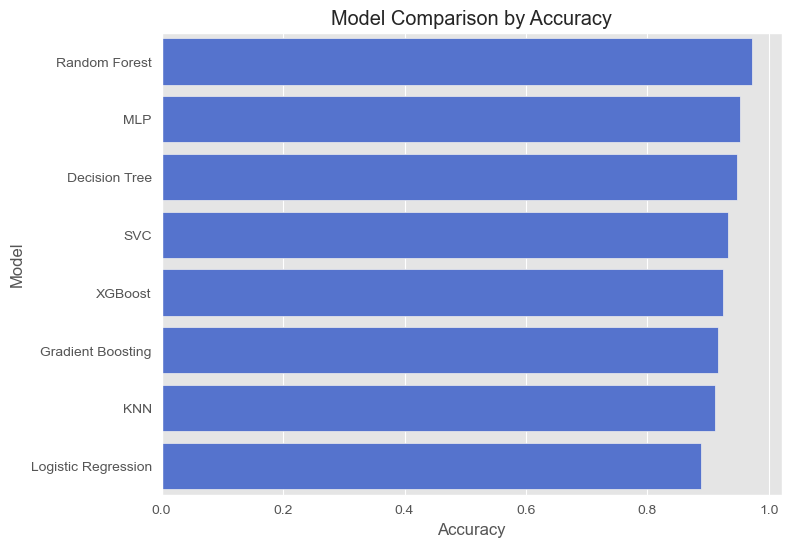

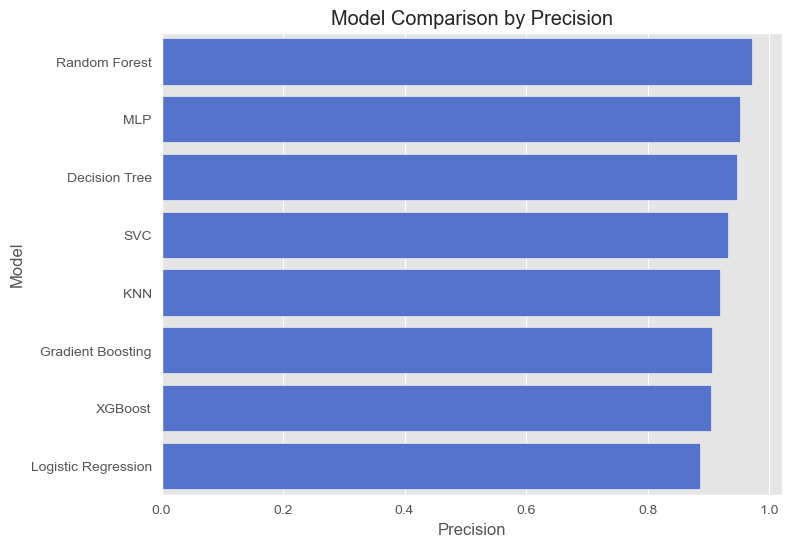

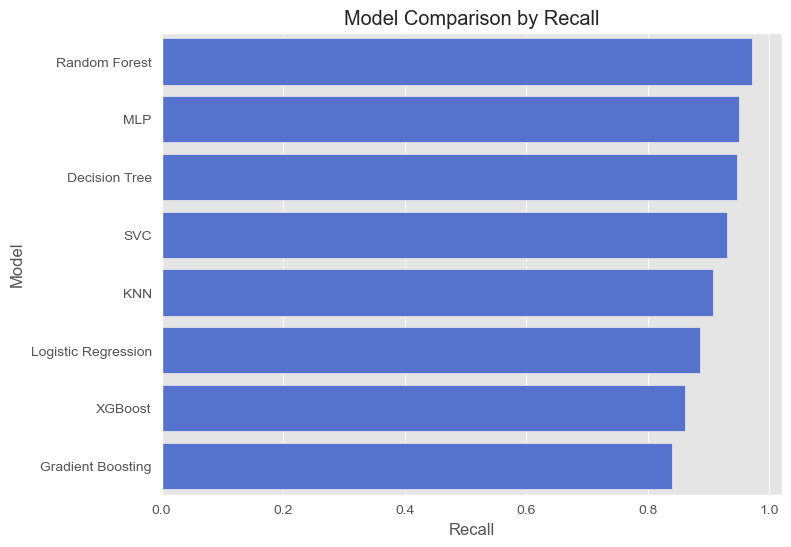

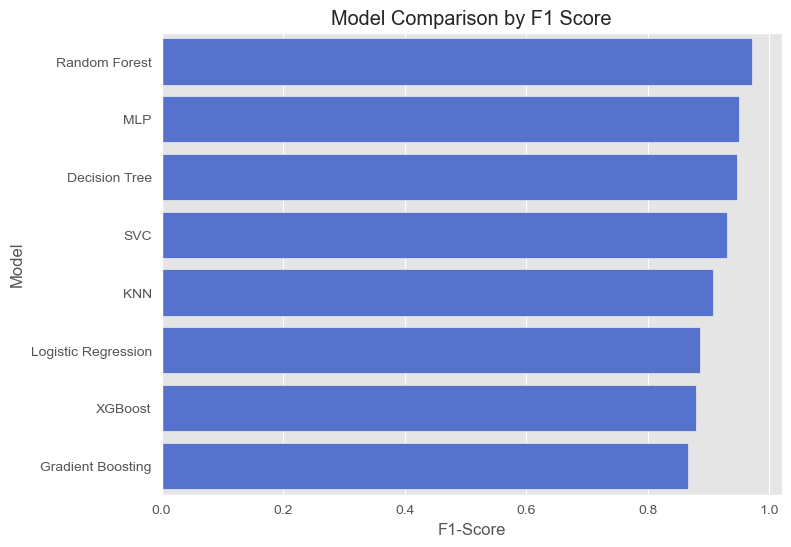

In [72]:
# Plot metrics horizontally

# Accuracy
plt.figure(figsize=(8, 6))
sns.barplot(data=metrics_df.sort_values(by='Accuracy', ascending=False), y='Model', x='Accuracy', color='royalblue')
plt.style.use('ggplot')
plt.title('Model Comparison by Accuracy')
plt.show()

# Precision
plt.figure(figsize=(8, 6))
sns.barplot(data=metrics_df.sort_values(by='Precision', ascending=False), y='Model', x='Precision', color='royalblue')
plt.style.use('ggplot')
plt.title('Model Comparison by Precision')
plt.show()

# Recall
plt.figure(figsize=(8, 6))
sns.barplot(data=metrics_df.sort_values(by='Recall', ascending=False), y='Model', x='Recall', color='royalblue')
plt.style.use('ggplot')
plt.title('Model Comparison by Recall')
plt.show()

# F1 Score
plt.figure(figsize=(8, 6))
sns.barplot(data=metrics_df.sort_values(by='F1-Score', ascending=False), y='Model', x='F1-Score', color='royalblue')
plt.style.use('ggplot')
plt.title('Model Comparison by F1 Score')
plt.show()



In [73]:
# Find the name of the best model based on accuracy
best_model_name = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Model']

In [74]:
# Print the best model name and accuracy
print(f"The best model is: {best_model_name} with an accuracy of {metrics_df['Accuracy'].max():.4f}")

The best model is: Random Forest with an accuracy of 0.9720


# 7. Model Interpretability and Implementation
* File: `predict_model.ipynb`
* This will include
    1) `Running and saving the best model`: Ensuring that features are properly aligned to those that will be used in the prediction and for saving.
    2) `Demonstrate feature importance`: Plot features and their scores in descending order.
    3) `Save and Load the Model`: Load your trained model from the specified path using an appropriate library like joblib.
    4) `Model Interpretability`: Anchor/explain top features, provide global summaries of the model, audit and detect biases.
    5) `Make Predictions`: Use the loaded model to make predictions based on the preprocessed data.
    6) `A brief conclusion`

## 7.1 Running and Saving the Best Model

In [75]:
# Import librabries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib

In [76]:
# Load cleaned and transformed data
df = pd.read_csv('./data/processed/selecteddata.csv')

In [77]:
# Separate features and target
X = df.drop(['Target'], axis=1)
y = df['Target']

In [78]:
# Plot the best model with feature decoding definitions

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling Imbalance (SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Convert X_train and X_test back to DataFrame with original column names
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define a parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    rf_model, 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=2
)

# Fit the model using GridSearchCV
grid_search.fit(X_train_df, y_train)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_df)

# Model Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Print the model metrics
print("Best parameters found: ", grid_search.best_params_)
print("Random Forest Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.9720457433290979
Confusion Matrix:
 [[271   7   0]
 [  7 240   3]
 [  0   5 254]]
Classification Report:
               precision    recall  f1-score   support

           2       0.97      0.97      0.97       278
           3       0.95      0.96      0.96       250
           4       0.99      0.98      0.98       259

    accuracy                           0.97       787
   macro avg       0.97      0.97      0.97       787
weighted avg       0.97      0.97      0.97       787



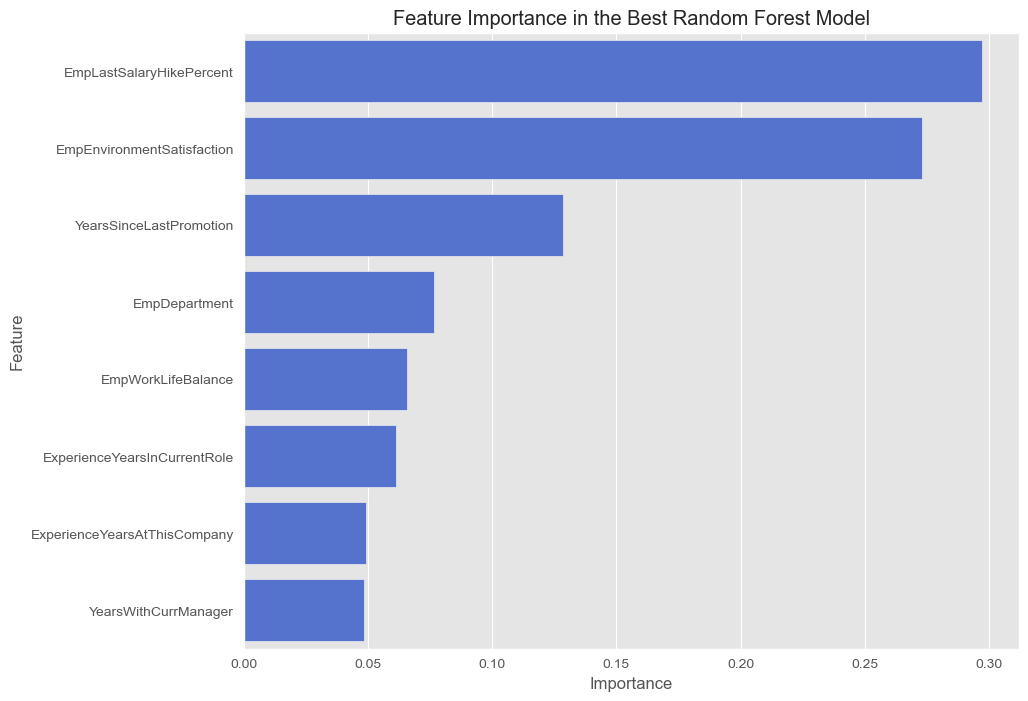

In [79]:
# Check if the number of features matches the length of feature_importances_
if len(best_rf.feature_importances_) == X_train_df.shape[1]:
    feature_importances = best_rf.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X_train_df.columns,
        'Importance': feature_importances
    })

    # Sort by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, color='royalblue')
    plt.title('Feature Importance in the Best Random Forest Model')
    plt.show()
else:
    print("Error: The number of features does not match the length of feature importances.")


In [80]:
# Initialize SHAP explainer with the best model
explainer = shap.TreeExplainer(best_rf)

In [81]:
# Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test_df)

In [82]:
print(type(shap_values))
print(dir(shap_values))


<class 'numpy.ndarray'>
['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdi

In [83]:
print(X_test_df.columns)


Index(['EmpDepartment', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [84]:
# Print the type of shap_values to ensure it's as expected
print(type(shap_values))


<class 'numpy.ndarray'>


In [85]:
# Check SHAP values type and shape
print("Type of shap_values:", type(shap_values))

if isinstance(shap_values, np.ndarray):
    # If SHAP values are a numpy array
    print("SHAP values shape:", shap_values.shape)
    
    # If it's a 2D array (for binary classification or regression)
    if len(shap_values.shape) == 2:
        shap_values_for_class = shap_values
    elif len(shap_values.shape) == 3:
        # If it's a 3D array (multi-class classification)
        print("SHAP values are in a 3D array format. Please specify class index.")
        class_index = 0  # Change this based on your needs
        shap_values_for_class = shap_values[:, :, class_index]
    else:
        raise ValueError("Unexpected SHAP values array shape.")
else:
    raise ValueError("Unexpected SHAP values format.")

Type of shap_values: <class 'numpy.ndarray'>
SHAP values shape: (787, 8, 3)
SHAP values are in a 3D array format. Please specify class index.


In [86]:
# 1. Create a list of features
features = X_train_df.columns
features

Index(['EmpDepartment', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [87]:
# 2. Set up SHAP explainer
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test_df)

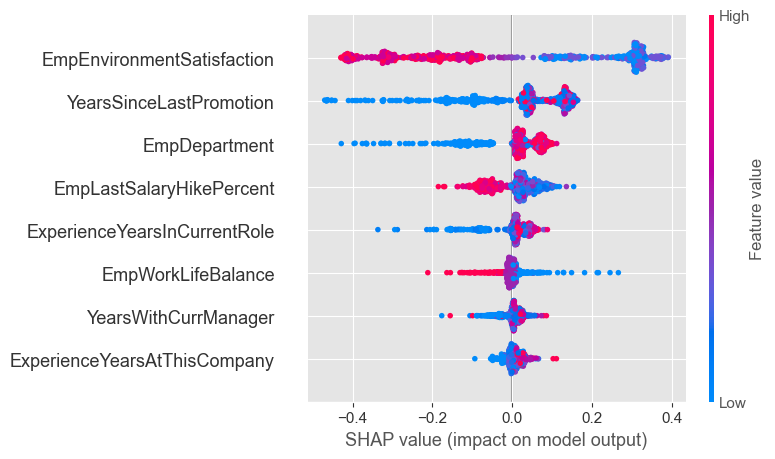

In [88]:
# 3. Summary plot for the specific class
shap.summary_plot(shap_values_for_class, X_test_df)

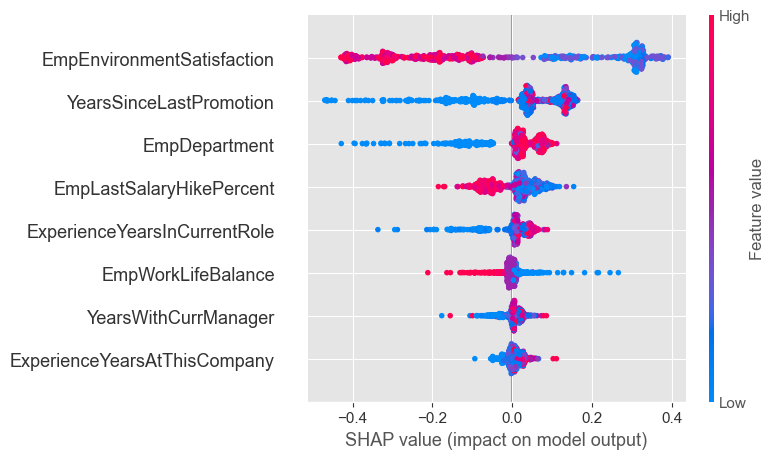

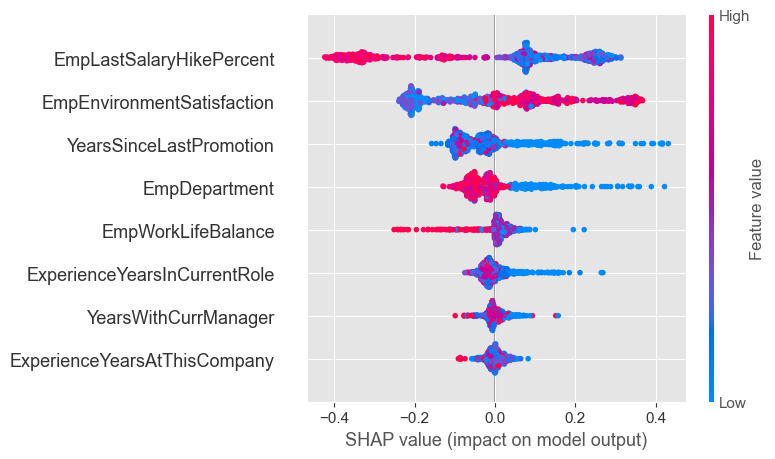

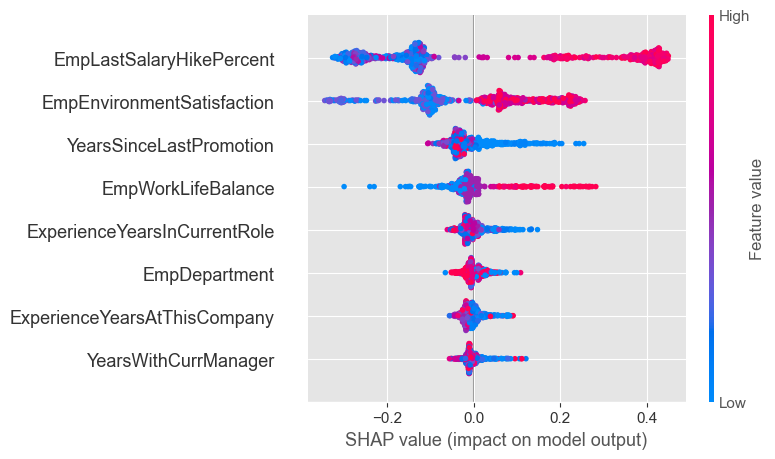

In [89]:
# 4. Display SHAP plots for different target values (if applicable)
for i in range(shap_values.shape[2]):
    shap_values_for_class = shap_values[:, :, i].reshape(-1, shap_values.shape[1])
    shap.summary_plot(shap_values_for_class, X_test_df, title=f"Summary Plot for Class {i}")


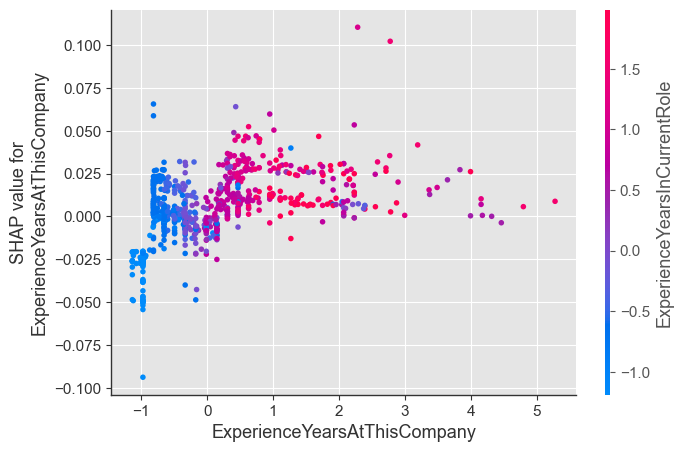

In [90]:
# 5. Dependence Plot for a specific feature
feature_name = 'ExperienceYearsAtThisCompany'
if feature_name in X_test_df.columns:
    try:
        shap.dependence_plot(
            feature_name, 
            shap_values[:, :, class_index],  # SHAP values for the specified class
            X_test_df, 
            interaction_index="ExperienceYearsInCurrentRole"
        )
    except Exception as e:
        print("Error in dependence plot:", e)
else:
    print(f"Feature '{feature_name}' not found in X_test_df columns.")

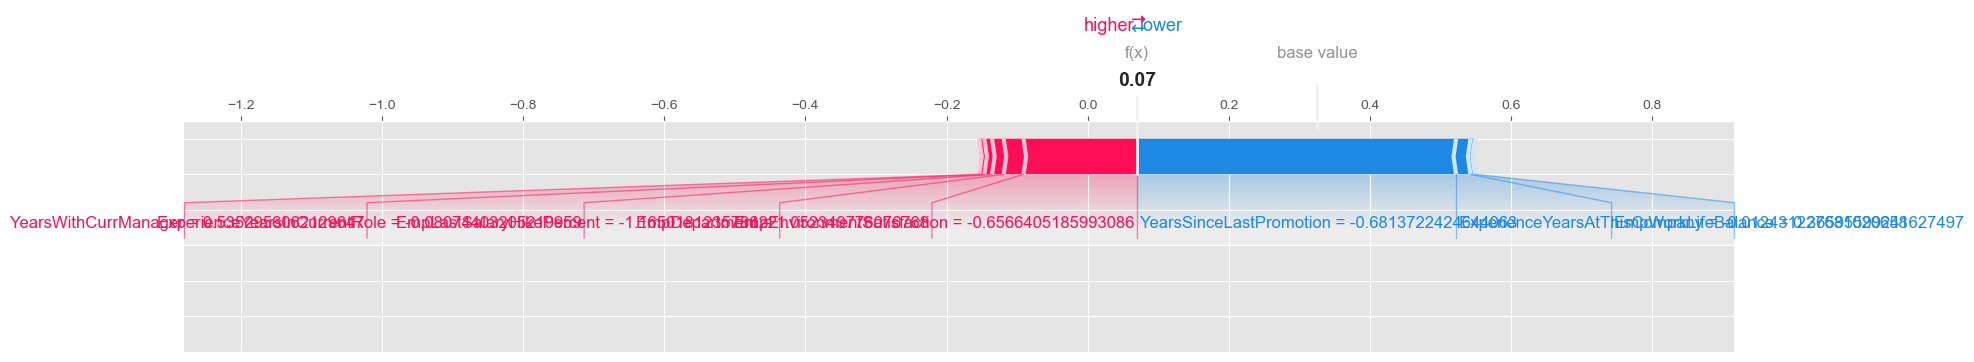

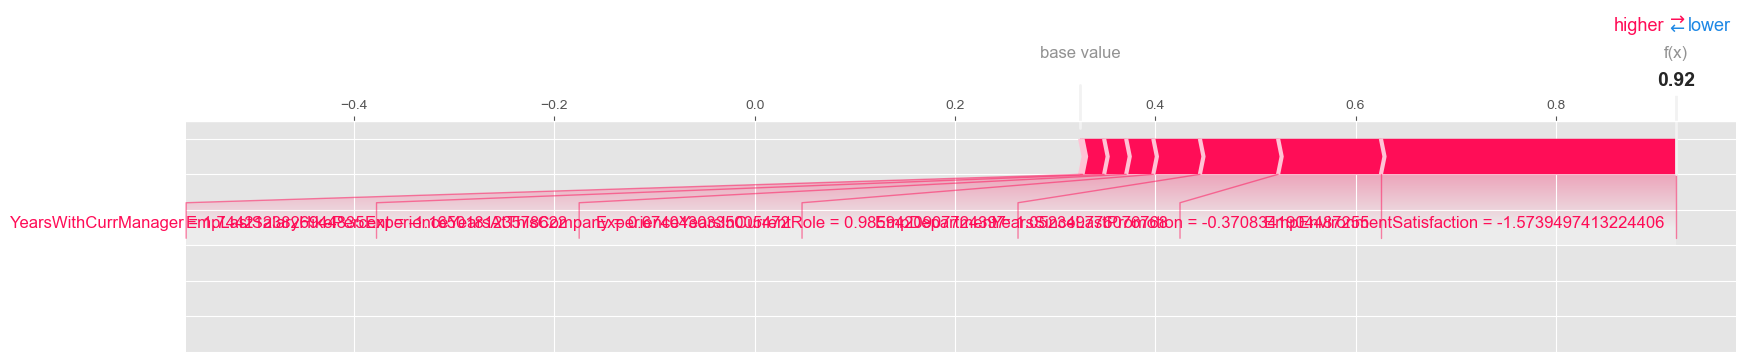

In [91]:
# 6. Force Plot for specific instances and classes
# Select specific instances for visualization
instance_indices = [0, 6]  # Example indices, adjust as needed
for idx in instance_indices:
    shap.plots.force(
        explainer.expected_value[class_index], 
        shap_values[idx, :, class_index],  # SHAP values for the specified class
        X_test_df.iloc[idx, :],
        matplotlib=True
    )

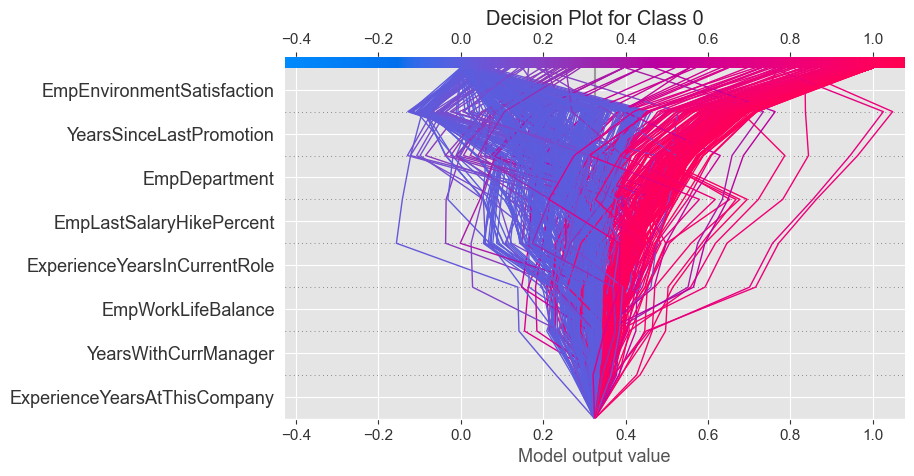

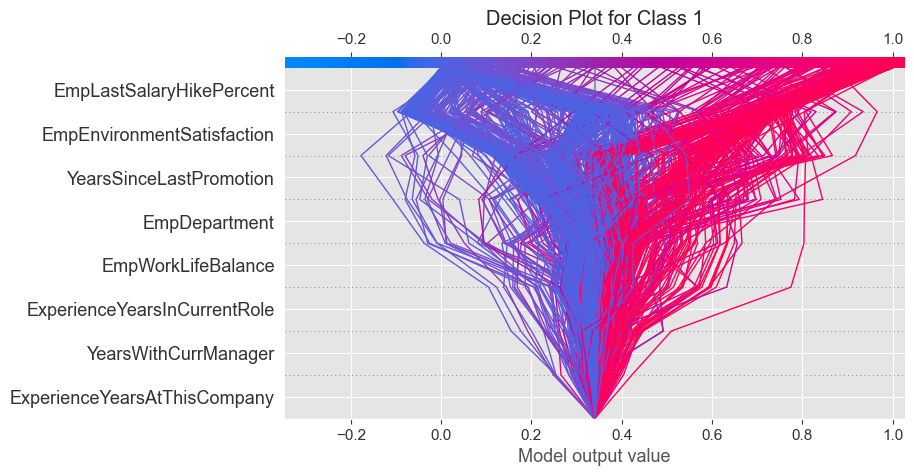

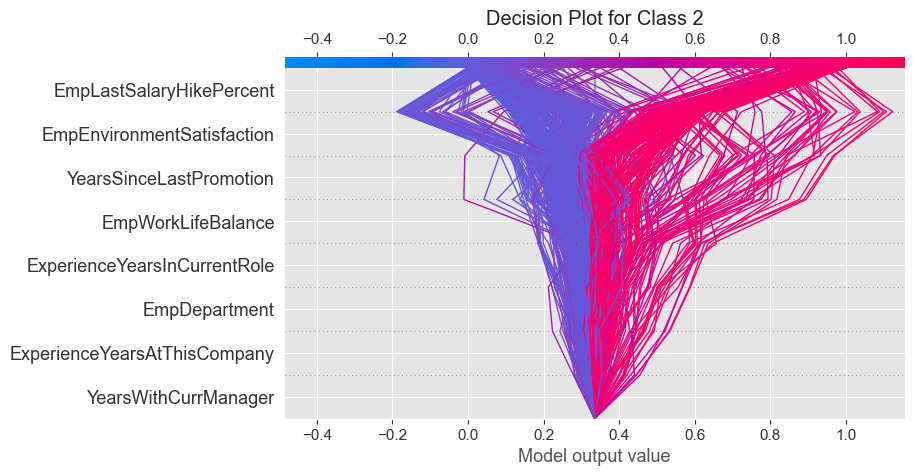

In [92]:
# 7. Decision plot for different classes
for i in range(shap_values.shape[2]):
    shap.decision_plot(
        explainer.expected_value[i],
        shap_values[:, :, i],  # SHAP values for the i-th class
        X_test_df.columns,
        title=f"Decision Plot for Class {i}"
    )

In [93]:
# 8. Save the best model
joblib.dump(best_rf, './data/processed/best_model.pkl')

['./data/processed/best_model.pkl']

In [94]:
# Load the saved model
model_path = './data/processed/best_model.pkl'
model = joblib.load(model_path)

# Check the model type
print(type(model))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [95]:
# Convert X_train back to DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Now you can print the columns
print("X_train columns:", X_train_df.columns)


X_train columns: Index(['EmpDepartment', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [96]:
# Check the feature names
features

Index(['EmpDepartment', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [97]:
# Load the saved model test 1
model_path = './data/processed/best_model.pkl'
model = joblib.load(model_path)

# Print model details for debugging
print(f"Model type: {type(model)}")
print(f"Number of classes: {model.n_classes_}")

# Define user data
user_data = {
    'EmpDepartment': [0],
    'EmpEnvironmentSatisfaction': [90],  # Example value
    'EmpLastSalaryHikePercent': [60],   # Example value
    'EmpWorkLifeBalance': [100],          # Example value
    'ExperienceYearsAtThisCompany': [0], # Example value
    'ExperienceYearsInCurrentRole': [0], # Example value
    'YearsSinceLastPromotion': [0],     # Example value
    'YearsWithCurrManager': [10]         # Example value
    
}

# Convert user data to a DataFrame
user_df = pd.DataFrame(user_data)

# Ensure the DataFrame columns match the model's expected feature names
feature_names = ['EmpDepartment', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
                  'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
                  'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
                  'YearsWithCurrManager']

user_df = user_df[feature_names]  # Reorder columns if necessary

# Get predictions and probabilities
predictions = model.predict(user_df)
probabilities = model.predict_proba(user_df)

# Print probabilities for debugging
print("Probabilities for each class:", probabilities)

# Handle multi-class classification
if probabilities.shape[1] > 1:
    # Get the class index with the highest probability
    predicted_class = np.argmax(probabilities[0])
    predicted_probability = probabilities[0][predicted_class] * 100  # Convert to percentage
else:
    # For binary classification
    predicted_class = predictions[0]
    predicted_probability = probabilities[0][predicted_class] * 100  # Convert to percentage

# Print the results
print(f"Your predicted Performance Rating is {predicted_class} and this has been with at least {predicted_probability:.2f}% accuracy.")


Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Number of classes: 3
Probabilities for each class: [[0.02 0.1  0.88]]
Your predicted Performance Rating is 2 and this has been with at least 88.00% accuracy.


In [98]:
# Load the saved model test 2
model_path = './data/processed/best_model.pkl'
model = joblib.load(model_path)

# Print model details for debugging
# print(f"Model type: {type(model)}")
# print(f"Number of classes: {model.n_classes_}")

# Define user data
user_data = {
    'EmpDepartment': [0],
    'EmpEnvironmentSatisfaction': [2],  # Example value
    'EmpLastSalaryHikePercent': [1],   # Example value
    'EmpWorkLifeBalance': [0],          # Example value
    'ExperienceYearsAtThisCompany': [0], # Example value
    'ExperienceYearsInCurrentRole': [10], # Example value
    'YearsSinceLastPromotion': [30],     # Example value
    'YearsWithCurrManager': [1]         # Example value
}

# Convert user data to a DataFrame
user_df = pd.DataFrame(user_data)

# Ensure the DataFrame columns match the model's expected feature names
feature_names = ['EmpDepartment', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
                  'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
                  'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
                  'YearsWithCurrManager']

user_df = user_df[feature_names]  # Reorder columns if necessary

# Get predictions and probabilities
predictions = model.predict(user_df)
probabilities = model.predict_proba(user_df) if hasattr(model, 'predict_proba') else None

# Extract predicted class and its probability
predicted_class = predictions[0]
predicted_class_index = model.classes_.tolist().index(predicted_class)
predicted_class_probability = probabilities[0][predicted_class_index] * 100 if probabilities is not None else None

# Display results in the specified format
print(f"Your Predicted Performance Rating is {predicted_class} at an estimated Probability of {predicted_class_probability:.2f}%.")


Your Predicted Performance Rating is 3 at an estimated Probability of 87.00%.


In [99]:
# Load the saved model test 3
model_path = './data/processed/best_model.pkl'
model = joblib.load(model_path)

# Define user data
user_data = {
    'EmpDepartment': [0],
    'EmpEnvironmentSatisfaction': [0],  # Example value
    'EmpLastSalaryHikePercent': [0],   # Example value
    'EmpWorkLifeBalance': [0],          # Example value
    'ExperienceYearsAtThisCompany': [0], # Example value
    'ExperienceYearsInCurrentRole': [0], # Example value
    'YearsSinceLastPromotion': [0],     # Example value
    'YearsWithCurrManager': [0]         # Example value
}

# Convert user data to a DataFrame
user_df = pd.DataFrame(user_data)

# Ensure the DataFrame columns match the model's expected feature names
feature_names_from_model = ['EmpDepartment', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
                  'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
                  'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
                  'YearsWithCurrManager']

# Reorder columns if necessary
user_df = user_df[feature_names_from_model]  

# Get predictions and probabilities
predictions = model.predict(user_df)
probabilities = model.predict_proba(user_df) if hasattr(model, 'predict_proba') else None

# Define possible performance ratings
possible_ratings = [1, 2, 3, 4]

# Check if class 1 is missing from model classes
missing_classes = [rating for rating in possible_ratings if rating not in model.classes_]

# Check if the model's prediction includes a missing class
default_class = missing_classes[0] if missing_classes else None

# Extract predicted class and its probability
predicted_class = predictions[0]
predicted_class_index = model.classes_.tolist().index(predicted_class) if predicted_class in model.classes_ else None
predicted_class_probability = probabilities[0][predicted_class_index] * 100 if probabilities is not None and predicted_class_index is not None else None

# Check if class 1 is needed and handle accordingly
if default_class is not None:
    if predicted_class not in possible_ratings:
        print(f"Model did not predict a valid class. Assuming default class {default_class}.")
        predicted_class = default_class
        predicted_class_probability = 100.0  # Assume class 1 with certainty if missing classes are involved
    else:
        print(f"Your Predicted Performance Rating is {predicted_class} at an estimated Probability of {predicted_class_probability:.2f}%.")
else:
    print(f"Your Predicted Performance Rating is {predicted_class} at an estimated Probability of {predicted_class_probability:.2f}%.")


Your Predicted Performance Rating is 2 at an estimated Probability of 47.50%.


In [100]:
# Load the saved model test 4
model_path = './data/processed/best_model.pkl'
model = joblib.load(model_path)

# Define user data
user_data = {
    'EmpDepartment': [0],
    'EmpEnvironmentSatisfaction': [0],  # Example value
    'EmpLastSalaryHikePercent': [30],    # Example value
    'EmpWorkLifeBalance': [0],          # Example value
    'ExperienceYearsAtThisCompany': [0],# Example value
    'ExperienceYearsInCurrentRole': [0],# Example value
    'YearsSinceLastPromotion': [0],     # Example value
    'YearsWithCurrManager': [40]         # Example value
}

# Convert user data to a DataFrame
user_df = pd.DataFrame(user_data)

# Ensure the DataFrame columns match the model's expected feature names
feature_names_from_model = ['EmpDepartment', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
                            'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
                            'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
                            'YearsWithCurrManager']

# Reorder columns if necessary
user_df = user_df[feature_names_from_model]  

# Get predictions and probabilities
predictions = model.predict(user_df)
probabilities = model.predict_proba(user_df) if hasattr(model, 'predict_proba') else None

# Define possible performance ratings
possible_ratings = [1, 2, 3, 4]

# Extract predicted class and its probability
predicted_class = predictions[0]

# If class 1 is not in the model's predicted classes, manually handle it
if 1 not in model.classes_:
    # Assign class 1 if conditions are severe enough (e.g., all zero input)
    if np.sum(user_df.values) == 0:
        predicted_class = 1
        predicted_class_probability = 100.0
    else:
        predicted_class_index = model.classes_.tolist().index(predicted_class)
        predicted_class_probability = probabilities[0][predicted_class_index] * 100 if probabilities is not None else None
else:
    predicted_class_index = model.classes_.tolist().index(predicted_class)
    predicted_class_probability = probabilities[0][predicted_class_index] * 100 if probabilities is not None else None

# Display the result
if predicted_class == 1:
    print(f"Your Predicted Performance Rating is {predicted_class} with an assumed Probability of {predicted_class_probability:.2f}%.")
else:
    print(f"Your Predicted Performance Rating is {predicted_class} at an estimated Probability of {predicted_class_probability:.2f}%.")


Your Predicted Performance Rating is 4 at an estimated Probability of 88.00%.
